In [1]:
cd ../..

D:\Users\mrefoyo\Proyectos\Sub-SpaCE_plus


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
import seaborn as sns
import plotly.express as px

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset, calculate_metrics_for_dataset_mp

print(tf.__version__)

2.13.0


In [21]:
DATASETS = [
    'ECG200', 'Gunpoint', 'Coffee', 'CBF',
    'ItalyPowerDemand', 'ProximalPhalanxOutlineCorrect', 'Strawberry', 'FordA', 'HandOutlines',
    'Plane', 'TwoPatterns', 'FacesUCR', 'ECG5000', 'CinCECGTorso', 'NonInvasiveFatalECGThorax2', 
]
MO_UTILITY = np.array([0.1, 0.4*0.7, 0.6*0.7, 0.2])
model_to_explain = "inceptiontime_noscaling"
scaling = "none"
osc_names = {"AE": "ae_basic_train", "IF": "if_basic_train", "LOF": "lof_basic_train"}
methods = {
    "ng": "NG",
    "glacier": "Glacier(AE)", 
    "glacier_NoAE": "Glacier", 
    "abcf": "AB-CF",
    "discox": "DiscoX",
    # "d98ff072a62c4346b035510c421f3498e40f8bbc": "Multi-SpaCE ($p^p=0.5$)",
    # "b36c8d082cce22e71013de720ae958cea4bd301a": "Multi-SpaCE ($p^p=0.75$)"
    "b36c8d082cce22e71013de720ae958cea4bd301a": "Multi-SpaCE"
    
}


# Get results

In [22]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
possible_nuns_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()
common_test_indexes_dict = {}

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model, outlier_calculators, possible_nuns, desired_classes = load_dataset_for_eval(dataset, model_to_explain, osc_names, scaling=scaling)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model
    outlier_calculators_dict[dataset] = outlier_calculators
    possible_nuns_dict[dataset] = possible_nuns
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset, common_test_indexes = calculate_metrics_for_dataset(
        dataset, methods, model_to_explain,
        data_tuple, original_classes, model, outlier_calculators, possible_nuns,
        mo_weights=MO_UTILITY
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])
    common_test_indexes_dict[dataset] = common_test_indexes

    # Store results
    # dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
# results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)

Calculating metrics for ECG200
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.64it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:27<00:00,  1.48s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.50it/s]


glacier


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.26it/s]


glacier_NoAE


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  6.75it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.17it/s]


Calculating metrics for Gunpoint
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.09it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [04:00<00:00,  2.41s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:31<00:00,  3.22it/s]


glacier


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:20<00:00,  4.79it/s]


glacier_NoAE


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.37it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:34<00:00,  2.88it/s]


Calculating metrics for Coffee
abcf


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:08<00:00,  3.33it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [01:13<00:00,  2.62s/it]


discox


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:08<00:00,  3.21it/s]


glacier


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:05<00:00,  4.76it/s]


glacier_NoAE


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:07<00:00,  3.74it/s]


ng


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:08<00:00,  3.23it/s]


Calculating metrics for CBF
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.79it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [04:07<00:00,  2.48s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.83it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.82it/s]


Calculating metrics for ItalyPowerDemand
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.17it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:37<00:00,  1.03it/s]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:17<00:00,  5.59it/s]


glacier


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:12<00:00,  8.15it/s]


glacier_NoAE


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.42it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:30<00:00,  3.31it/s]


Calculating metrics for ProximalPhalanxOutlineCorrect
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.81it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:14<00:00,  1.95s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.85it/s]


glacier


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:27<00:00,  3.62it/s]


glacier_NoAE


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.71it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.67it/s]


Calculating metrics for Strawberry
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.51it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:49<00:00,  4.69s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:37<00:00,  2.65it/s]


glacier


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:32<00:00,  3.05it/s]


glacier_NoAE


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.55it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.39it/s]


Calculating metrics for FordA
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.39it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [14:01<00:00,  8.41s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:35<00:00,  2.80it/s]


glacier


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:28<00:00,  3.55it/s]


glacier_NoAE


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.16it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.40it/s]


Calculating metrics for HandOutlines
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:26<00:00,  1.15it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:08:42<00:00, 41.23s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:27<00:00,  1.14it/s]


glacier


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:27<00:00,  1.14it/s]


glacier_NoAE


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:27<00:00,  1.14it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:29<00:00,  1.12it/s]


Calculating metrics for Plane
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:40<00:00,  2.47it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [06:09<00:00,  3.70s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.39it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.39it/s]


Calculating metrics for TwoPatterns
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:42<00:00,  2.37it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:33<00:00,  3.34s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.20it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.19it/s]


Calculating metrics for FacesUCR
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:44<00:00,  2.25it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [06:05<00:00,  3.65s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.13it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:47<00:00,  2.09it/s]


Calculating metrics for ECG5000
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:39<00:00,  2.55it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [07:02<00:00,  4.23s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:36<00:00,  2.74it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:41<00:00,  2.42it/s]


Calculating metrics for CinCECGTorso
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:54<00:00,  1.84it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [22:10<00:00, 13.31s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:54<00:00,  1.82it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.81it/s]


Calculating metrics for NonInvasiveFatalECGThorax2
abcf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:52<00:00,  1.92it/s]


b36c8d082cce22e71013de720ae958cea4bd301a


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [21:03<00:00, 12.64s/it]


discox


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.81it/s]


ng


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:55<00:00,  1.81it/s]


In [23]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

ECG200


method            ii       nchanges     sparsity             L1           L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %           times  best cf index
0        AB-CF  49.5 ± 29.01  46.29 ± 22.83  0.48 ± 0.24   18.73 ± 9.81  3.38 ± 1.17  0.81 ± 0.16  0.84 ± 0.37  nan ± nan  0.92 ± 0.29  0.45 ± 0.18   0.5 ± 0.38  0.12 ± 0.14   0.07 ± 0.1  0.22 ± 0.29  1.99 ± 0.74    0.04 ± 0.02     1.69 ± 1.34      0.0 ± 0.0
1  Multi-SpaCE  49.5 ± 29.01   11.13 ± 5.95  0.12 ± 0.06    8.21 ± 5.43  2.67 ± 1.19  0.85 ± 0.13    1.0 ± 0.0  1.0 ± 0.0  0.85 ± 0.26  0.39 ± 0.22  0.48 ± 0.33  0.05 ± 0.06  0.03 ± 0.04  0.21 ± 0.25  1.43 ± 0.59    0.03 ± 0.01   131.14 ± 8.44  52.96 ± 30.91
2       DiscoX  49.5 ± 29.01  44.02 ± 21.36  0.46 ± 0.22  25.35 ± 16.74   4.91 ± 2.7  0.53 ± 0.03  0.86 ± 0.35  nan ± nan   1.09 ± 0.4  0.49 ± 0.17   1.0 ± 0.87  0.31 ± 0.36  0.13 ± 0.15  0.74 ± 0.86  5.71 ± 3.94    0.12 ± 0.08  167.06 ± 116.9      0.0 ± 0.0
3  Glacier(AE)  49.5 ± 29.01     96.0 ± 0.0    1.0 ± 0.0   14.71 ± 3.07  1.97 ± 0.45   0.7 ± 0.23  0.13 ± 0.34  nan ± nan  0.45 ± 0.06   0.4 ± 0.16   0.2 ± 0.13    0.0 ± 0.0  0.01 ± 0.02  0.01 ± 0.03    1.0 ± 0.0     0.02 ± 0.0  112.86 ± 23.61      0.0 ± 0.0
4      Glacier  49.5 ± 29.01     96.0 ± 0.0    1.0 ± 0.0    3.35 ± 2.57  0.42 ± 0.32  0.51 ± 0.03  0.17 ± 0.38  nan ± nan    0.8 ± 0.2  0.44 ± 0.18  0.31 ± 0.27  0.02 ± 0.03  0.01 ± 0.02  0.01 ± 0.02    1.0 ± 0.0     0.02 ± 0.0  120.71 ± 27.68      0.0 ± 0.0
5           NG  49.5 ± 29.01   32.3 ± 20.29  0.34 ± 0.21   13.88 ± 9.89  3.04 ± 1.53  0.64 ± 0.13    1.0 ± 0.0  nan ± nan  0.81 ± 0.23  0.38 ± 0.18  0.44 ± 0.32  0.05 ± 0.07  0.04 ± 0.06   0.2 ± 0.25    1.0 ± 0.0     0.02 ± 0.0     5.78 ± 3.13      0.0 ± 0.0

Gunpoint


method             ii       nchanges     sparsity             L1           L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %            times  best cf index
0        AB-CF  73.78 ± 40.93   83.7 ± 38.68  0.56 ± 0.26  19.19 ± 10.46  3.07 ± 1.72  0.82 ± 0.16    1.0 ± 0.0  nan ± nan  0.78 ± 0.09   0.2 ± 0.14   0.1 ± 0.12  0.03 ± 0.05  0.03 ± 0.05  0.01 ± 0.01  1.91 ± 0.53    0.03 ± 0.01      1.63 ± 1.27      0.0 ± 0.0
1  Multi-SpaCE  73.78 ± 40.93  21.94 ± 10.68  0.15 ± 0.07     9.37 ± 6.8  2.36 ± 1.72  0.82 ± 0.13    1.0 ± 0.0  1.0 ± 0.0   0.8 ± 0.07  0.21 ± 0.15   0.1 ± 0.15  0.02 ± 0.02  0.02 ± 0.04   0.0 ± 0.01  1.53 ± 0.64    0.02 ± 0.01   190.28 ± 23.51  48.57 ± 29.09
2       DiscoX  73.78 ± 40.93   56.01 ± 28.9  0.37 ± 0.19  25.71 ± 21.97   4.1 ± 2.85  0.52 ± 0.03  0.91 ± 0.29  nan ± nan  0.85 ± 0.19  0.29 ± 0.15   0.2 ± 0.27  0.08 ± 0.16   0.09 ± 0.1  0.09 ± 0.21  4.95 ± 5.18    0.07 ± 0.07  255.57 ± 224.07      0.0 ± 0.0
3  Glacier(AE)  73.78 ± 40.93    150.0 ± 0.0    1.0 ± 0.0   40.11 ± 4.11  4.02 ± 0.29  0.93 ± 0.15   0.3 ± 0.46  nan ± nan  0.58 ± 0.05  0.35 ± 0.08  0.11 ± 0.12    0.0 ± 0.0  0.15 ± 0.08  0.01 ± 0.01    1.0 ± 0.0     0.01 ± 0.0   138.99 ± 20.16      0.0 ± 0.0
4      Glacier  73.78 ± 40.93    150.0 ± 0.0    1.0 ± 0.0    4.13 ± 2.24  0.43 ± 0.24   0.5 ± 0.01  0.38 ± 0.49  nan ± nan  0.76 ± 0.05  0.16 ± 0.12  0.08 ± 0.05   0.0 ± 0.01  0.01 ± 0.01    0.0 ± 0.0    1.0 ± 0.0     0.01 ± 0.0    127.4 ± 27.72      0.0 ± 0.0
5           NG  73.78 ± 40.93  33.76 ± 23.47  0.23 ± 0.16   10.12 ± 7.92  2.31 ± 1.66   0.6 ± 0.13    1.0 ± 0.0  nan ± nan   0.81 ± 0.1  0.21 ± 0.16  0.11 ± 0.15  0.03 ± 0.04  0.03 ± 0.04  0.01 ± 0.02    1.0 ± 0.0     0.01 ± 0.0      9.38 ± 5.82      0.0 ± 0.0

Coffee


method           ii       nchanges     sparsity             L1            L2        proba        valid nuns_valid        AE_OS        IF_OS        LOF_OS       AE_IOS       IF_IOS      LOF_IOS  subsequences subsequences %           times  best cf index
0        AB-CF  13.5 ± 8.23  147.0 ± 57.85   0.51 ± 0.2   12.41 ± 4.72   1.33 ± 0.32  0.65 ± 0.11    1.0 ± 0.0  nan ± nan  0.98 ± 0.01   0.3 ± 0.27    0.3 ± 0.53  0.01 ± 0.01  0.02 ± 0.04  0.02 ± 0.04   1.82 ± 0.94    0.01 ± 0.01     1.29 ± 1.18      0.0 ± 0.0
1  Multi-SpaCE  13.5 ± 8.23  28.61 ± 10.18   0.1 ± 0.04     5.87 ± 1.8   1.23 ± 0.24  0.78 ± 0.11    1.0 ± 0.0  1.0 ± 0.0  0.98 ± 0.01   0.4 ± 0.27   0.46 ± 0.75    0.0 ± 0.0  0.03 ± 0.03  0.07 ± 0.12   3.07 ± 1.18    0.02 ± 0.01   111.16 ± 5.83  49.54 ± 30.77
2       DiscoX  13.5 ± 8.23  87.04 ± 35.06   0.3 ± 0.12  19.52 ± 18.23   2.93 ± 3.05  0.51 ± 0.01    1.0 ± 0.0  nan ± nan  0.96 ± 0.05  0.44 ± 0.24   3.99 ± 6.71  0.01 ± 0.01  0.08 ± 0.08  3.59 ± 6.73  10.93 ± 9.67    0.08 ± 0.07  256.6 ± 146.73      0.0 ± 0.0
3  Glacier(AE)  13.5 ± 8.23    286.0 ± 0.0    1.0 ± 0.0  180.51 ± 2.11  12.32 ± 0.04    1.0 ± 0.0  0.46 ± 0.51  nan ± nan   0.32 ± 0.0  1.32 ± 0.01  27.42 ± 0.45    0.0 ± 0.0  0.94 ± 0.37  26.8 ± 1.11     1.0 ± 0.0     0.01 ± 0.0  215.64 ± 34.51      0.0 ± 0.0
4      Glacier  13.5 ± 8.23    286.0 ± 0.0    1.0 ± 0.0     4.73 ± 1.4   0.37 ± 0.11    0.5 ± 0.0  0.75 ± 0.44  nan ± nan  0.98 ± 0.01  0.41 ± 0.25   0.38 ± 0.43    0.0 ± 0.0  0.05 ± 0.06  0.04 ± 0.05     1.0 ± 0.0     0.01 ± 0.0   99.74 ± 24.26      0.0 ± 0.0
5           NG  13.5 ± 8.23  64.29 ± 24.84  0.22 ± 0.09    8.27 ± 2.62   1.32 ± 0.26  0.54 ± 0.04    1.0 ± 0.0  nan ± nan  0.99 ± 0.01  0.37 ± 0.28   0.44 ± 0.79  0.01 ± 0.01  0.02 ± 0.05  0.06 ± 0.11     1.0 ± 0.0     0.01 ± 0.0    10.74 ± 4.19      0.0 ± 0.0

CBF


method               ii       nchanges     sparsity             L1           L2        proba      valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %           times best cf index
0        AB-CF  453.74 ± 263.51  56.64 ± 20.54  0.44 ± 0.16  46.51 ± 15.92  7.67 ± 1.87  0.76 ± 0.16  1.0 ± 0.0  nan ± nan  0.95 ± 0.08  0.47 ± 0.19  0.13 ± 0.13  0.07 ± 0.07  0.04 ± 0.07  0.01 ± 0.03  2.24 ± 1.04    0.04 ± 0.02     1.48 ± 1.29     0.0 ± 0.0
1  Multi-SpaCE  453.74 ± 263.51   26.73 ± 8.98  0.21 ± 0.07   27.22 ± 9.31  6.03 ± 1.34  0.81 ± 0.11  1.0 ± 0.0  1.0 ± 0.0  0.89 ± 0.07  0.41 ± 0.15  0.13 ± 0.11  0.01 ± 0.02  0.02 ± 0.05  0.02 ± 0.05   1.85 ± 0.5    0.03 ± 0.01  167.73 ± 21.02  43.8 ± 30.22
2       DiscoX  453.74 ± 263.51   45.64 ± 18.9  0.36 ± 0.15  33.08 ± 18.56  5.71 ± 2.16   0.5 ± 0.04  1.0 ± 0.0  nan ± nan   0.87 ± 0.1  0.52 ± 0.22   0.2 ± 0.23  0.01 ± 0.04  0.08 ± 0.15   0.05 ± 0.1  5.75 ± 3.38    0.09 ± 0.05  119.23 ± 71.53     0.0 ± 0.0
3           NG  453.74 ± 263.51     39.8 ± 9.3  0.31 ± 0.07   30.38 ± 9.29   5.85 ± 1.3  0.57 ± 0.08  1.0 ± 0.0  nan ± nan  0.96 ± 0.09   0.5 ± 0.22  0.18 ± 0.21  0.08 ± 0.06  0.04 ± 0.06  0.02 ± 0.07    1.0 ± 0.0     0.02 ± 0.0     5.81 ± 1.31     0.0 ± 0.0

ItalyPowerDemand


method               ii      nchanges     sparsity           L1           L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %           times  best cf index
0        AB-CF  545.74 ± 297.62   13.25 ± 4.7   0.55 ± 0.2   4.6 ± 2.62  1.52 ± 0.74  0.74 ± 0.17   0.48 ± 0.5  nan ± nan  0.62 ± 0.18  0.23 ± 0.17  0.09 ± 0.16  0.08 ± 0.09  0.02 ± 0.03  0.02 ± 0.04  2.67 ± 0.78    0.22 ± 0.07     1.84 ± 1.26      0.0 ± 0.0
1  Multi-SpaCE  545.74 ± 297.62   6.64 ± 5.24  0.28 ± 0.22  3.56 ± 2.73  1.54 ± 0.74  0.86 ± 0.12    1.0 ± 0.0  1.0 ± 0.0   0.59 ± 0.2   0.22 ± 0.2   0.1 ± 0.19  0.03 ± 0.05  0.01 ± 0.02  0.01 ± 0.03  1.24 ± 0.49     0.1 ± 0.04    76.7 ± 12.18  49.45 ± 33.74
2       DiscoX  545.74 ± 297.62  12.21 ± 4.91   0.51 ± 0.2  5.57 ± 3.39  1.95 ± 1.11  0.53 ± 0.03  0.39 ± 0.49  nan ± nan  0.96 ± 0.41  0.32 ± 0.19  0.14 ± 0.18  0.41 ± 0.36  0.13 ± 0.12  0.07 ± 0.13  1.79 ± 1.32    0.15 ± 0.11   52.63 ± 29.14      0.0 ± 0.0
3  Glacier(AE)  545.74 ± 297.62    24.0 ± 0.0    1.0 ± 0.0   4.8 ± 2.58  1.28 ± 0.71  0.67 ± 0.18  0.13 ± 0.34  nan ± nan  0.26 ± 0.19  0.22 ± 0.18  0.08 ± 0.12    0.0 ± 0.0  0.02 ± 0.03    0.0 ± 0.0    1.0 ± 0.0     0.08 ± 0.0  205.14 ± 54.65      0.0 ± 0.0
4      Glacier  545.74 ± 297.62    24.0 ± 0.0    1.0 ± 0.0   1.58 ± 0.8  0.39 ± 0.19  0.55 ± 0.04  0.06 ± 0.24  nan ± nan  0.77 ± 0.21  0.41 ± 0.21   0.3 ± 0.23  0.03 ± 0.04  0.02 ± 0.03    0.0 ± 0.0    1.0 ± 0.0     0.08 ± 0.0   87.76 ± 24.18      0.0 ± 0.0
5           NG  545.74 ± 297.62  16.95 ± 4.04  0.71 ± 0.17   5.2 ± 2.52  1.65 ± 0.74  0.85 ± 0.17    1.0 ± 0.0  nan ± nan   0.55 ± 0.2  0.23 ± 0.19   0.11 ± 0.2  0.04 ± 0.09  0.03 ± 0.05  0.01 ± 0.03    1.0 ± 0.0     0.08 ± 0.0     5.46 ± 1.81      0.0 ± 0.0

ProximalPhalanxOutlineCorrect


method              ii       nchanges     sparsity           L1           L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %           times  best cf index
0        AB-CF  146.25 ± 83.86  42.39 ± 21.42  0.53 ± 0.27  2.07 ± 1.45   0.37 ± 0.2  0.83 ± 0.16  0.97 ± 0.17  nan ± nan  0.12 ± 0.05  0.16 ± 0.11  0.06 ± 0.04  0.01 ± 0.02  0.01 ± 0.03  0.01 ± 0.02  1.78 ± 0.71    0.04 ± 0.02     1.69 ± 1.37      0.0 ± 0.0
1  Multi-SpaCE  146.25 ± 83.86    5.33 ± 3.84  0.07 ± 0.05  0.41 ± 0.31  0.19 ± 0.11   0.9 ± 0.09    1.0 ± 0.0  1.0 ± 0.0  0.12 ± 0.05  0.18 ± 0.13  0.07 ± 0.09  0.01 ± 0.02   0.0 ± 0.01  0.01 ± 0.05  1.39 ± 0.62    0.03 ± 0.02  120.13 ± 23.51  40.38 ± 33.85
2       DiscoX  146.25 ± 83.86  27.78 ± 15.87   0.35 ± 0.2  4.38 ± 6.52  1.13 ± 1.58  0.53 ± 0.03  0.92 ± 0.27  nan ± nan  0.38 ± 0.49   0.28 ± 0.2  0.53 ± 0.96  0.28 ± 0.48   0.1 ± 0.12  0.47 ± 0.95  5.26 ± 3.99     0.13 ± 0.1    81.36 ± 80.7      0.0 ± 0.0
3  Glacier(AE)  146.25 ± 83.86     80.0 ± 0.0    1.0 ± 0.0  1.64 ± 0.65  0.25 ± 0.09  0.58 ± 0.14   0.57 ± 0.5  nan ± nan  0.03 ± 0.02  0.11 ± 0.09  0.04 ± 0.03    0.0 ± 0.0   0.0 ± 0.01  0.01 ± 0.02    1.0 ± 0.0     0.02 ± 0.0  283.86 ± 69.05      0.0 ± 0.0
4      Glacier  146.25 ± 83.86     80.0 ± 0.0    1.0 ± 0.0  0.53 ± 0.35  0.07 ± 0.05  0.51 ± 0.03   0.99 ± 0.1  nan ± nan  0.12 ± 0.04  0.19 ± 0.13  0.06 ± 0.05  0.01 ± 0.01  0.01 ± 0.02  0.01 ± 0.01    1.0 ± 0.0     0.02 ± 0.0    92.52 ± 28.1      0.0 ± 0.0
5           NG  146.25 ± 83.86  35.76 ± 21.77  0.45 ± 0.27  1.71 ± 1.33  0.33 ± 0.18  0.72 ± 0.16    1.0 ± 0.0  nan ± nan  0.11 ± 0.04  0.16 ± 0.13  0.06 ± 0.09  0.01 ± 0.02  0.01 ± 0.02  0.01 ± 0.05    1.0 ± 0.0     0.02 ± 0.0     9.61 ± 5.94      0.0 ± 0.0

Strawberry


method               ii        nchanges     sparsity             L1           L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS  subsequences subsequences %            times  best cf index
0        AB-CF  167.28 ± 108.07  128.57 ± 62.81  0.55 ± 0.27    7.43 ± 8.63    0.8 ± 0.8  0.81 ± 0.16    1.0 ± 0.0  nan ± nan   0.33 ± 0.2   0.12 ± 0.1  0.09 ± 0.12  0.09 ± 0.13   0.0 ± 0.01  0.02 ± 0.06   1.82 ± 1.01    0.02 ± 0.01      1.83 ± 1.35      0.0 ± 0.0
1  Multi-SpaCE  167.28 ± 108.07    14.39 ± 8.63  0.06 ± 0.04     1.2 ± 1.24  0.36 ± 0.32  0.89 ± 0.09    1.0 ± 0.0  1.0 ± 0.0  0.35 ± 0.18  0.15 ± 0.14  0.11 ± 0.14   0.09 ± 0.1    0.0 ± 0.0   0.0 ± 0.01   1.92 ± 0.87    0.02 ± 0.01   246.53 ± 46.38  50.87 ± 29.86
2       DiscoX  167.28 ± 108.07   97.65 ± 50.67  0.42 ± 0.22  12.83 ± 16.34   1.81 ± 2.2  0.53 ± 0.03  0.83 ± 0.38  nan ± nan   0.75 ± 0.8  0.18 ± 0.17  0.37 ± 0.55  0.51 ± 0.75  0.05 ± 0.07  0.28 ± 0.49  10.81 ± 8.94    0.09 ± 0.08   333.31 ± 251.5      0.0 ± 0.0
3  Glacier(AE)  167.28 ± 108.07     235.0 ± 0.0    1.0 ± 0.0    2.65 ± 1.26  0.22 ± 0.11  0.51 ± 0.02  0.62 ± 0.49  nan ± nan  0.15 ± 0.07  0.08 ± 0.08  0.08 ± 0.12    0.0 ± 0.0   0.0 ± 0.01    0.0 ± 0.0     1.0 ± 0.0     0.01 ± 0.0  435.69 ± 116.56      0.0 ± 0.0
4      Glacier  167.28 ± 108.07     235.0 ± 0.0    1.0 ± 0.0    1.29 ± 0.84  0.11 ± 0.08  0.51 ± 0.03  0.88 ± 0.33  nan ± nan  0.29 ± 0.16  0.14 ± 0.14  0.09 ± 0.11  0.05 ± 0.07   0.0 ± 0.01    0.0 ± 0.0     1.0 ± 0.0     0.01 ± 0.0   140.02 ± 25.42      0.0 ± 0.0
5           NG  167.28 ± 108.07   96.72 ± 51.62  0.41 ± 0.22    6.21 ± 5.98  0.81 ± 0.72  0.63 ± 0.14    1.0 ± 0.0  nan ± nan  0.32 ± 0.23  0.13 ± 0.12  0.11 ± 0.14  0.08 ± 0.15   0.0 ± 0.01  0.01 ± 0.03     1.0 ± 0.0     0.01 ± 0.0    26.99 ± 15.09      0.0 ± 0.0

FordA


method               ii         nchanges     sparsity              L1            L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %            times  best cf index
0        AB-CF  626.89 ± 401.09  318.37 ± 113.38  0.64 ± 0.23   241.96 ± 95.5  16.43 ± 4.69  0.84 ± 0.16  0.98 ± 0.14  nan ± nan  0.37 ± 0.13  0.63 ± 0.26  0.29 ± 0.18  0.05 ± 0.07  0.13 ± 0.18  0.02 ± 0.05    2.39 ± 0.97     0.01 ± 0.0      3.28 ± 1.38      0.0 ± 0.0
1  Multi-SpaCE  626.89 ± 401.09    45.49 ± 45.39  0.09 ± 0.09   45.22 ± 45.34    7.22 ± 3.7  0.91 ± 0.07    1.0 ± 0.0  1.0 ± 0.0  0.46 ± 0.17  0.58 ± 0.17   0.39 ± 0.2  0.07 ± 0.06  0.05 ± 0.09  0.01 ± 0.02    4.25 ± 2.45    0.02 ± 0.01  526.87 ± 161.45  40.74 ± 26.86
2       DiscoX  626.89 ± 401.09  292.01 ± 105.75  0.58 ± 0.21  166.12 ± 85.96  12.45 ± 5.02  0.54 ± 0.04  0.71 ± 0.46  nan ± nan   0.4 ± 0.12  0.08 ± 0.28  0.25 ± 0.12  0.05 ± 0.07   0.0 ± 0.01   0.0 ± 0.01  10.85 ± 10.13    0.04 ± 0.04  818.59 ± 417.58      0.0 ± 0.0
3  Glacier(AE)  626.89 ± 401.09      500.0 ± 0.0    1.0 ± 0.0   95.68 ± 47.22    5.6 ± 2.74  0.58 ± 0.17  0.38 ± 0.49  nan ± nan   0.1 ± 0.03  0.36 ± 0.16  0.29 ± 0.16    0.0 ± 0.0   0.0 ± 0.01    0.0 ± 0.0      1.0 ± 0.0      0.0 ± 0.0   535.12 ± 85.99      0.0 ± 0.0
4      Glacier  626.89 ± 401.09      500.0 ± 0.0    1.0 ± 0.0    10.43 ± 9.48   0.59 ± 0.59  0.52 ± 0.05    0.2 ± 0.4  nan ± nan  0.31 ± 0.13   0.5 ± 0.13   0.3 ± 0.18  0.01 ± 0.01  0.01 ± 0.01    0.0 ± 0.0      1.0 ± 0.0      0.0 ± 0.0   241.98 ± 26.01      0.0 ± 0.0
5           NG  626.89 ± 401.09  213.73 ± 103.45  0.43 ± 0.21  169.01 ± 87.11  13.66 ± 4.98  0.62 ± 0.11    1.0 ± 0.0  nan ± nan  0.35 ± 0.12  0.52 ± 0.28   0.3 ± 0.18  0.02 ± 0.04  0.09 ± 0.14  0.02 ± 0.04      1.0 ± 0.0      0.0 ± 0.0   115.64 ± 70.41      0.0 ± 0.0

HandOutlines


method               ii          nchanges     sparsity               L1           L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %              times  best cf index
0        AB-CF  167.28 ± 108.07  1294.14 ± 743.58  0.48 ± 0.27   105.83 ± 91.47  3.44 ± 2.04  0.74 ± 0.15  0.87 ± 0.34  nan ± nan  0.32 ± 0.05  0.11 ± 0.09  0.03 ± 0.02  0.07 ± 0.05   0.0 ± 0.01    0.0 ± 0.0    2.37 ± 0.81      0.0 ± 0.0          3.4 ± 1.8      0.0 ± 0.0
1  Multi-SpaCE  167.28 ± 108.07      29.18 ± 16.7  0.01 ± 0.01      2.87 ± 2.26  0.55 ± 0.28  0.89 ± 0.06    1.0 ± 0.0  1.0 ± 0.0  0.29 ± 0.07   0.12 ± 0.1  0.03 ± 0.02  0.05 ± 0.06    0.0 ± 0.0    0.0 ± 0.0    2.48 ± 1.34      0.0 ± 0.0    2183.87 ± 40.58  53.89 ± 30.64
2       DiscoX  167.28 ± 108.07  1053.83 ± 557.27  0.39 ± 0.21  177.66 ± 217.44   6.87 ± 7.4  0.52 ± 0.02  0.94 ± 0.24  nan ± nan  0.48 ± 0.36  0.17 ± 0.12   0.1 ± 0.15  0.24 ± 0.35  0.05 ± 0.07  0.07 ± 0.15  90.98 ± 77.42    0.07 ± 0.06  5462.97 ± 7074.98      0.0 ± 0.0
3  Glacier(AE)  167.28 ± 108.07      2709.0 ± 0.0    1.0 ± 0.0     12.27 ± 1.32  0.31 ± 0.03  0.51 ± 0.01   0.99 ± 0.1  nan ± nan  0.26 ± 0.02   0.12 ± 0.1  0.03 ± 0.02  0.02 ± 0.02    0.0 ± 0.0    0.0 ± 0.0      1.0 ± 0.0      0.0 ± 0.0    1377.9 ± 285.04      0.0 ± 0.0
4      Glacier  167.28 ± 108.07      2709.0 ± 0.0    1.0 ± 0.0      6.15 ± 2.78  0.14 ± 0.07    0.5 ± 0.0    1.0 ± 0.0  nan ± nan  0.26 ± 0.02   0.12 ± 0.1  0.03 ± 0.02  0.01 ± 0.01    0.0 ± 0.0    0.0 ± 0.0      1.0 ± 0.0      0.0 ± 0.0     797.31 ± 69.38      0.0 ± 0.0
5           NG  167.28 ± 108.07   826.37 ± 496.53  0.31 ± 0.18    61.45 ± 47.69  2.45 ± 1.41  0.57 ± 0.12    1.0 ± 0.0  nan ± nan  0.27 ± 0.03   0.12 ± 0.1  0.03 ± 0.02  0.03 ± 0.02  0.01 ± 0.01    0.0 ± 0.0      1.0 ± 0.0      0.0 ± 0.0   2518.64 ± 2058.6      0.0 ± 0.0

Plane


method             ii       nchanges     sparsity             L1           L2        proba      valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %            times best cf index
0        AB-CF  52.55 ± 30.34   82.6 ± 39.02  0.57 ± 0.27  43.54 ± 30.21  5.83 ± 3.15  0.77 ± 0.21  1.0 ± 0.0  nan ± nan  0.74 ± 0.31  0.26 ± 0.09  0.12 ± 0.14  0.39 ± 0.34  0.05 ± 0.05  0.06 ± 0.09   1.8 ± 0.68    0.02 ± 0.01      1.63 ± 1.29     0.0 ± 0.0
1  Multi-SpaCE  52.55 ± 30.34  32.61 ± 14.72   0.23 ± 0.1  18.93 ± 10.99   3.59 ± 1.6  0.78 ± 0.14  1.0 ± 0.0  1.0 ± 0.0  0.52 ± 0.12  0.26 ± 0.13   0.07 ± 0.1  0.16 ± 0.13  0.02 ± 0.02   0.0 ± 0.01  1.94 ± 0.68    0.03 ± 0.01   181.06 ± 23.71  49.27 ± 29.0
2       DiscoX  52.55 ± 30.34  78.67 ± 28.06  0.55 ± 0.19   49.6 ± 25.06   6.7 ± 2.59  0.41 ± 0.08  1.0 ± 0.0  nan ± nan  1.04 ± 0.31  0.45 ± 0.14   0.3 ± 0.24  0.67 ± 0.31   0.2 ± 0.12  0.19 ± 0.25  5.74 ± 3.44    0.08 ± 0.05  295.01 ± 225.72     0.0 ± 0.0
3           NG  52.55 ± 30.34  61.01 ± 21.26  0.42 ± 0.15  24.68 ± 12.58  3.86 ± 1.67  0.67 ± 0.17  1.0 ± 0.0  nan ± nan  0.51 ± 0.13  0.26 ± 0.11  0.07 ± 0.09  0.15 ± 0.13  0.02 ± 0.03   0.0 ± 0.01    1.0 ± 0.0     0.01 ± 0.0      8.42 ± 3.15     0.0 ± 0.0

TwoPatterns


method                 ii       nchanges     sparsity             L1           L2        proba      valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %            times  best cf index
0        AB-CF  2029.67 ± 1160.55  76.08 ± 31.83  0.59 ± 0.25  56.67 ± 22.89  8.84 ± 1.92  0.89 ± 0.16  1.0 ± 0.0  nan ± nan  0.76 ± 0.16  0.34 ± 0.17  0.26 ± 0.17  0.17 ± 0.15   0.06 ± 0.1  0.06 ± 0.12  2.15 ± 0.83    0.03 ± 0.01      1.84 ± 1.29      0.0 ± 0.0
1  Multi-SpaCE  2029.67 ± 1160.55   15.69 ± 5.18  0.12 ± 0.04   24.21 ± 7.43  6.25 ± 1.01   0.92 ± 0.1  1.0 ± 0.0  1.0 ± 0.0  0.65 ± 0.11  0.36 ± 0.19   0.31 ± 0.2  0.04 ± 0.04  0.07 ± 0.09   0.1 ± 0.14   1.43 ± 0.5    0.02 ± 0.01   167.54 ± 23.83  51.07 ± 31.52
2       DiscoX  2029.67 ± 1160.55   38.9 ± 17.97   0.3 ± 0.14  23.26 ± 10.25  5.45 ± 1.42  0.54 ± 0.05  1.0 ± 0.0  nan ± nan  1.03 ± 0.22  0.51 ± 0.18   0.6 ± 0.35  0.41 ± 0.21  0.17 ± 0.11  0.36 ± 0.29  5.12 ± 2.45    0.08 ± 0.04  245.12 ± 357.35      0.0 ± 0.0
3           NG  2029.67 ± 1160.55  37.32 ± 21.06  0.29 ± 0.16  28.58 ± 10.74   6.46 ± 1.1  0.65 ± 0.15  1.0 ± 0.0  nan ± nan   0.7 ± 0.13  0.38 ± 0.21  0.34 ± 0.24  0.09 ± 0.09  0.07 ± 0.09  0.12 ± 0.16    1.0 ± 0.0     0.02 ± 0.0      6.07 ± 3.28      0.0 ± 0.0

FacesUCR


method               ii       nchanges     sparsity             L1           L2        proba      valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %            times  best cf index
0        AB-CF  977.63 ± 568.84  74.88 ± 25.48  0.57 ± 0.19  50.54 ± 20.81    7.6 ± 2.4   0.68 ± 0.2  1.0 ± 0.0  nan ± nan  0.61 ± 0.18   0.48 ± 0.2  0.31 ± 0.26  0.07 ± 0.08  0.06 ± 0.09   0.06 ± 0.1   2.9 ± 0.77    0.04 ± 0.01      1.62 ± 1.28      0.0 ± 0.0
1  Multi-SpaCE  977.63 ± 568.84  26.06 ± 11.95   0.2 ± 0.09  23.36 ± 11.04  5.51 ± 1.78  0.75 ± 0.18  1.0 ± 0.0  1.0 ± 0.0  0.52 ± 0.13  0.41 ± 0.17  0.22 ± 0.21  0.02 ± 0.03  0.02 ± 0.04  0.01 ± 0.02  2.23 ± 1.03    0.03 ± 0.02   175.27 ± 24.16  49.76 ± 28.38
2       DiscoX  977.63 ± 568.84  79.29 ± 24.23  0.61 ± 0.18  66.99 ± 27.59  9.51 ± 3.05  0.31 ± 0.11  1.0 ± 0.0  nan ± nan  0.68 ± 0.15  0.52 ± 0.24   0.4 ± 0.35  0.15 ± 0.16  0.13 ± 0.19   0.18 ± 0.3  3.96 ± 2.37    0.06 ± 0.04  469.35 ± 339.95      0.0 ± 0.0
3           NG  977.63 ± 568.84  48.85 ± 21.29  0.37 ± 0.16  31.43 ± 15.32   5.7 ± 2.17  0.51 ± 0.15  1.0 ± 0.0  nan ± nan  0.51 ± 0.13  0.41 ± 0.18  0.24 ± 0.24  0.02 ± 0.04  0.03 ± 0.06  0.02 ± 0.06    1.0 ± 0.0     0.02 ± 0.0      6.81 ± 2.85      0.0 ± 0.0

ECG5000


method                 ii        nchanges     sparsity             L1           L2        proba        valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS subsequences subsequences %            times  best cf index
0        AB-CF  2252.07 ± 1214.06  113.25 ± 25.41  0.81 ± 0.18  61.78 ± 24.28  7.56 ± 2.03  0.87 ± 0.13  0.67 ± 0.47  nan ± nan  0.42 ± 0.24  0.37 ± 0.13  0.26 ± 0.13  0.16 ± 0.11   0.2 ± 0.16  0.16 ± 0.11  1.57 ± 0.68    0.02 ± 0.01       2.1 ± 1.37      0.0 ± 0.0
1  Multi-SpaCE  2252.07 ± 1214.06    30.31 ± 9.79  0.22 ± 0.07  31.63 ± 11.88  6.38 ± 1.88    0.9 ± 0.1    1.0 ± 0.0  1.0 ± 0.0   0.36 ± 0.2  0.27 ± 0.15  0.25 ± 0.14  0.11 ± 0.08  0.09 ± 0.06   0.16 ± 0.1   1.2 ± 0.43    0.02 ± 0.01   181.94 ± 16.38  53.62 ± 31.86
2       DiscoX  2252.07 ± 1214.06    72.64 ± 27.4   0.52 ± 0.2  62.77 ± 24.21  9.74 ± 2.72  0.49 ± 0.01  0.76 ± 0.43  nan ± nan  0.57 ± 0.27  0.36 ± 0.14  0.48 ± 0.22  0.32 ± 0.25  0.17 ± 0.14  0.37 ± 0.24  5.41 ± 3.16    0.08 ± 0.05  777.18 ± 890.06      0.0 ± 0.0
3           NG  2252.07 ± 1214.06   35.73 ± 16.79  0.26 ± 0.12  25.99 ± 12.01  5.02 ± 1.43  0.62 ± 0.12    1.0 ± 0.0  nan ± nan  0.48 ± 0.19  0.28 ± 0.16  0.24 ± 0.14  0.23 ± 0.11   0.1 ± 0.09   0.14 ± 0.1    1.0 ± 0.0     0.01 ± 0.0      5.21 ± 1.69      0.0 ± 0.0

CinCECGTorso


method               ii         nchanges     sparsity               L1             L2        proba      valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS  subsequences subsequences %              times best cf index
0        AB-CF  679.81 ± 418.95  813.37 ± 408.24   0.5 ± 0.25  558.18 ± 324.72  30.77 ± 14.56  0.64 ± 0.16  1.0 ± 0.0  nan ± nan  0.82 ± 0.16  0.47 ± 0.25  2.68 ± 4.01  0.11 ± 0.12   0.14 ± 0.2  2.22 ± 3.99   2.26 ± 0.86      0.0 ± 0.0        1.84 ± 1.41     0.0 ± 0.0
1  Multi-SpaCE  679.81 ± 418.95  314.64 ± 565.63  0.19 ± 0.35  251.53 ± 407.76  18.92 ± 16.06  0.74 ± 0.19  1.0 ± 0.0  1.0 ± 0.0  0.79 ± 0.13   0.4 ± 0.22   0.55 ± 0.5  0.07 ± 0.09  0.06 ± 0.15   0.1 ± 0.46   3.93 ± 4.24     0.0 ± 0.01    849.95 ± 442.08  43.3 ± 33.33
2       DiscoX  679.81 ± 418.95  609.13 ± 292.45  0.37 ± 0.18  425.95 ± 209.36   26.7 ± 11.01  0.44 ± 0.05  1.0 ± 0.0  nan ± nan  0.63 ± 0.14  0.31 ± 0.21  0.81 ± 1.41  0.01 ± 0.04  0.02 ± 0.06  0.39 ± 1.39  25.7 ± 35.31    0.03 ± 0.04  5552.49 ± 3899.53     0.0 ± 0.0
3           NG  679.81 ± 418.95  447.54 ± 271.34  0.27 ± 0.17  423.09 ± 225.24  30.55 ± 12.17  0.48 ± 0.08  1.0 ± 0.0  nan ± nan  0.79 ± 0.16  0.41 ± 0.21  1.49 ± 2.37  0.08 ± 0.09   0.08 ± 0.1  1.04 ± 2.31     1.0 ± 0.0      0.0 ± 0.0     276.3 ± 210.95     0.0 ± 0.0

NonInvasiveFatalECGThorax2


method               ii         nchanges     sparsity              L1            L2        proba      valid nuns_valid        AE_OS        IF_OS       LOF_OS       AE_IOS       IF_IOS      LOF_IOS   subsequences subsequences %              times  best cf index
0        AB-CF  985.29 ± 574.39  390.75 ± 211.41  0.52 ± 0.28   47.87 ± 32.78    3.67 ± 2.4   0.8 ± 0.17  1.0 ± 0.0  nan ± nan   0.1 ± 0.04  0.19 ± 0.13  0.03 ± 0.04  0.01 ± 0.01  0.01 ± 0.02  0.01 ± 0.03    1.99 ± 0.75     0.01 ± 0.0        2.06 ± 1.37      0.0 ± 0.0
1  Multi-SpaCE  985.29 ± 574.39    68.06 ± 54.79  0.09 ± 0.07   13.59 ± 11.46   1.86 ± 1.15  0.78 ± 0.14  1.0 ± 0.0  1.0 ± 0.0  0.11 ± 0.03   0.2 ± 0.14  0.02 ± 0.03  0.01 ± 0.01   0.0 ± 0.01    0.0 ± 0.0    3.66 ± 2.43    0.01 ± 0.01     739.07 ± 223.6  46.23 ± 30.74
2       DiscoX  985.29 ± 574.39  405.09 ± 138.09  0.54 ± 0.18  145.8 ± 104.62  10.59 ± 7.01   0.33 ± 0.1  1.0 ± 0.0  nan ± nan  0.15 ± 0.05  0.33 ± 0.17   0.2 ± 0.21  0.06 ± 0.05  0.14 ± 0.16  0.17 ± 0.21  13.39 ± 12.97    0.04 ± 0.03  2729.67 ± 3033.59      0.0 ± 0.0
3           NG  985.29 ± 574.39  244.36 ± 189.95  0.33 ± 0.25   26.75 ± 19.97   2.21 ± 1.21  0.49 ± 0.07  1.0 ± 0.0  nan ± nan   0.1 ± 0.03  0.19 ± 0.14  0.02 ± 0.02  0.01 ± 0.01  0.01 ± 0.02    0.0 ± 0.0      1.0 ± 0.0      0.0 ± 0.0      68.02 ± 57.52      0.0 ± 0.0

In [24]:
columns = ["sparsity", "L2", "valid", "AE_IOS", "IF_IOS", "LOF_IOS", "subsequences", "times"]
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset].set_index("method").sort_index()[columns])

ECG200


sparsity           L2        valid       AE_IOS       IF_IOS      LOF_IOS subsequences           times
method                                                                                                                
AB-CF        0.48 ± 0.24  3.38 ± 1.17  0.84 ± 0.37  0.12 ± 0.14   0.07 ± 0.1  0.22 ± 0.29  1.99 ± 0.74     1.69 ± 1.34
DiscoX       0.46 ± 0.22   4.91 ± 2.7  0.86 ± 0.35  0.31 ± 0.36  0.13 ± 0.15  0.74 ± 0.86  5.71 ± 3.94  167.06 ± 116.9
Glacier        1.0 ± 0.0  0.42 ± 0.32  0.17 ± 0.38  0.02 ± 0.03  0.01 ± 0.02  0.01 ± 0.02    1.0 ± 0.0  120.71 ± 27.68
Glacier(AE)    1.0 ± 0.0  1.97 ± 0.45  0.13 ± 0.34    0.0 ± 0.0  0.01 ± 0.02  0.01 ± 0.03    1.0 ± 0.0  112.86 ± 23.61
Multi-SpaCE  0.12 ± 0.06  2.67 ± 1.19    1.0 ± 0.0  0.05 ± 0.06  0.03 ± 0.04  0.21 ± 0.25  1.43 ± 0.59   131.14 ± 8.44
NG           0.34 ± 0.21  3.04 ± 1.53    1.0 ± 0.0  0.05 ± 0.07  0.04 ± 0.06   0.2 ± 0.25    1.0 ± 0.0     5.78 ± 3.13

Gunpoint


sparsity           L2        valid       AE_IOS       IF_IOS      LOF_IOS subsequences            times
method                                                                                                                 
AB-CF        0.56 ± 0.26  3.07 ± 1.72    1.0 ± 0.0  0.03 ± 0.05  0.03 ± 0.05  0.01 ± 0.01  1.91 ± 0.53      1.63 ± 1.27
DiscoX       0.37 ± 0.19   4.1 ± 2.85  0.91 ± 0.29  0.08 ± 0.16   0.09 ± 0.1  0.09 ± 0.21  4.95 ± 5.18  255.57 ± 224.07
Glacier        1.0 ± 0.0  0.43 ± 0.24  0.38 ± 0.49   0.0 ± 0.01  0.01 ± 0.01    0.0 ± 0.0    1.0 ± 0.0    127.4 ± 27.72
Glacier(AE)    1.0 ± 0.0  4.02 ± 0.29   0.3 ± 0.46    0.0 ± 0.0  0.15 ± 0.08  0.01 ± 0.01    1.0 ± 0.0   138.99 ± 20.16
Multi-SpaCE  0.15 ± 0.07  2.36 ± 1.72    1.0 ± 0.0  0.02 ± 0.02  0.02 ± 0.04   0.0 ± 0.01  1.53 ± 0.64   190.28 ± 23.51
NG           0.23 ± 0.16  2.31 ± 1.66    1.0 ± 0.0  0.03 ± 0.04  0.03 ± 0.04  0.01 ± 0.02    1.0 ± 0.0      9.38 ± 5.82

Coffee


sparsity            L2        valid       AE_IOS       IF_IOS      LOF_IOS  subsequences           times
method                                                                                                                  
AB-CF         0.51 ± 0.2   1.33 ± 0.32    1.0 ± 0.0  0.01 ± 0.01  0.02 ± 0.04  0.02 ± 0.04   1.82 ± 0.94     1.29 ± 1.18
DiscoX        0.3 ± 0.12   2.93 ± 3.05    1.0 ± 0.0  0.01 ± 0.01  0.08 ± 0.08  3.59 ± 6.73  10.93 ± 9.67  256.6 ± 146.73
Glacier        1.0 ± 0.0   0.37 ± 0.11  0.75 ± 0.44    0.0 ± 0.0  0.05 ± 0.06  0.04 ± 0.05     1.0 ± 0.0   99.74 ± 24.26
Glacier(AE)    1.0 ± 0.0  12.32 ± 0.04  0.46 ± 0.51    0.0 ± 0.0  0.94 ± 0.37  26.8 ± 1.11     1.0 ± 0.0  215.64 ± 34.51
Multi-SpaCE   0.1 ± 0.04   1.23 ± 0.24    1.0 ± 0.0    0.0 ± 0.0  0.03 ± 0.03  0.07 ± 0.12   3.07 ± 1.18   111.16 ± 5.83
NG           0.22 ± 0.09   1.32 ± 0.26    1.0 ± 0.0  0.01 ± 0.01  0.02 ± 0.05  0.06 ± 0.11     1.0 ± 0.0    10.74 ± 4.19

CBF


sparsity           L2      valid       AE_IOS       IF_IOS      LOF_IOS subsequences           times
method                                                                                                              
AB-CF        0.44 ± 0.16  7.67 ± 1.87  1.0 ± 0.0  0.07 ± 0.07  0.04 ± 0.07  0.01 ± 0.03  2.24 ± 1.04     1.48 ± 1.29
DiscoX       0.36 ± 0.15  5.71 ± 2.16  1.0 ± 0.0  0.01 ± 0.04  0.08 ± 0.15   0.05 ± 0.1  5.75 ± 3.38  119.23 ± 71.53
Multi-SpaCE  0.21 ± 0.07  6.03 ± 1.34  1.0 ± 0.0  0.01 ± 0.02  0.02 ± 0.05  0.02 ± 0.05   1.85 ± 0.5  167.73 ± 21.02
NG           0.31 ± 0.07   5.85 ± 1.3  1.0 ± 0.0  0.08 ± 0.06  0.04 ± 0.06  0.02 ± 0.07    1.0 ± 0.0     5.81 ± 1.31

ItalyPowerDemand


sparsity           L2        valid       AE_IOS       IF_IOS      LOF_IOS subsequences           times
method                                                                                                                
AB-CF         0.55 ± 0.2  1.52 ± 0.74   0.48 ± 0.5  0.08 ± 0.09  0.02 ± 0.03  0.02 ± 0.04  2.67 ± 0.78     1.84 ± 1.26
DiscoX        0.51 ± 0.2  1.95 ± 1.11  0.39 ± 0.49  0.41 ± 0.36  0.13 ± 0.12  0.07 ± 0.13  1.79 ± 1.32   52.63 ± 29.14
Glacier        1.0 ± 0.0  0.39 ± 0.19  0.06 ± 0.24  0.03 ± 0.04  0.02 ± 0.03    0.0 ± 0.0    1.0 ± 0.0   87.76 ± 24.18
Glacier(AE)    1.0 ± 0.0  1.28 ± 0.71  0.13 ± 0.34    0.0 ± 0.0  0.02 ± 0.03    0.0 ± 0.0    1.0 ± 0.0  205.14 ± 54.65
Multi-SpaCE  0.28 ± 0.22  1.54 ± 0.74    1.0 ± 0.0  0.03 ± 0.05  0.01 ± 0.02  0.01 ± 0.03  1.24 ± 0.49    76.7 ± 12.18
NG           0.71 ± 0.17  1.65 ± 0.74    1.0 ± 0.0  0.04 ± 0.09  0.03 ± 0.05  0.01 ± 0.03    1.0 ± 0.0     5.46 ± 1.81

ProximalPhalanxOutlineCorrect


sparsity           L2        valid       AE_IOS       IF_IOS      LOF_IOS subsequences           times
method                                                                                                                
AB-CF        0.53 ± 0.27   0.37 ± 0.2  0.97 ± 0.17  0.01 ± 0.02  0.01 ± 0.03  0.01 ± 0.02  1.78 ± 0.71     1.69 ± 1.37
DiscoX        0.35 ± 0.2  1.13 ± 1.58  0.92 ± 0.27  0.28 ± 0.48   0.1 ± 0.12  0.47 ± 0.95  5.26 ± 3.99    81.36 ± 80.7
Glacier        1.0 ± 0.0  0.07 ± 0.05   0.99 ± 0.1  0.01 ± 0.01  0.01 ± 0.02  0.01 ± 0.01    1.0 ± 0.0    92.52 ± 28.1
Glacier(AE)    1.0 ± 0.0  0.25 ± 0.09   0.57 ± 0.5    0.0 ± 0.0   0.0 ± 0.01  0.01 ± 0.02    1.0 ± 0.0  283.86 ± 69.05
Multi-SpaCE  0.07 ± 0.05  0.19 ± 0.11    1.0 ± 0.0  0.01 ± 0.02   0.0 ± 0.01  0.01 ± 0.05  1.39 ± 0.62  120.13 ± 23.51
NG           0.45 ± 0.27  0.33 ± 0.18    1.0 ± 0.0  0.01 ± 0.02  0.01 ± 0.02  0.01 ± 0.05    1.0 ± 0.0     9.61 ± 5.94

Strawberry


sparsity           L2        valid       AE_IOS       IF_IOS      LOF_IOS  subsequences            times
method                                                                                                                  
AB-CF        0.55 ± 0.27    0.8 ± 0.8    1.0 ± 0.0  0.09 ± 0.13   0.0 ± 0.01  0.02 ± 0.06   1.82 ± 1.01      1.83 ± 1.35
DiscoX       0.42 ± 0.22   1.81 ± 2.2  0.83 ± 0.38  0.51 ± 0.75  0.05 ± 0.07  0.28 ± 0.49  10.81 ± 8.94   333.31 ± 251.5
Glacier        1.0 ± 0.0  0.11 ± 0.08  0.88 ± 0.33  0.05 ± 0.07   0.0 ± 0.01    0.0 ± 0.0     1.0 ± 0.0   140.02 ± 25.42
Glacier(AE)    1.0 ± 0.0  0.22 ± 0.11  0.62 ± 0.49    0.0 ± 0.0   0.0 ± 0.01    0.0 ± 0.0     1.0 ± 0.0  435.69 ± 116.56
Multi-SpaCE  0.06 ± 0.04  0.36 ± 0.32    1.0 ± 0.0   0.09 ± 0.1    0.0 ± 0.0   0.0 ± 0.01   1.92 ± 0.87   246.53 ± 46.38
NG           0.41 ± 0.22  0.81 ± 0.72    1.0 ± 0.0  0.08 ± 0.15   0.0 ± 0.01  0.01 ± 0.03     1.0 ± 0.0    26.99 ± 15.09

FordA


sparsity            L2        valid       AE_IOS       IF_IOS      LOF_IOS   subsequences            times
method                                                                                                                    
AB-CF        0.64 ± 0.23  16.43 ± 4.69  0.98 ± 0.14  0.05 ± 0.07  0.13 ± 0.18  0.02 ± 0.05    2.39 ± 0.97      3.28 ± 1.38
DiscoX       0.58 ± 0.21  12.45 ± 5.02  0.71 ± 0.46  0.05 ± 0.07   0.0 ± 0.01   0.0 ± 0.01  10.85 ± 10.13  818.59 ± 417.58
Glacier        1.0 ± 0.0   0.59 ± 0.59    0.2 ± 0.4  0.01 ± 0.01  0.01 ± 0.01    0.0 ± 0.0      1.0 ± 0.0   241.98 ± 26.01
Glacier(AE)    1.0 ± 0.0    5.6 ± 2.74  0.38 ± 0.49    0.0 ± 0.0   0.0 ± 0.01    0.0 ± 0.0      1.0 ± 0.0   535.12 ± 85.99
Multi-SpaCE  0.09 ± 0.09    7.22 ± 3.7    1.0 ± 0.0  0.07 ± 0.06  0.05 ± 0.09  0.01 ± 0.02    4.25 ± 2.45  526.87 ± 161.45
NG           0.43 ± 0.21  13.66 ± 4.98    1.0 ± 0.0  0.02 ± 0.04  0.09 ± 0.14  0.02 ± 0.04      1.0 ± 0.0   115.64 ± 70.41

HandOutlines


sparsity           L2        valid       AE_IOS       IF_IOS      LOF_IOS   subsequences              times
method                                                                                                                     
AB-CF        0.48 ± 0.27  3.44 ± 2.04  0.87 ± 0.34  0.07 ± 0.05   0.0 ± 0.01    0.0 ± 0.0    2.37 ± 0.81          3.4 ± 1.8
DiscoX       0.39 ± 0.21   6.87 ± 7.4  0.94 ± 0.24  0.24 ± 0.35  0.05 ± 0.07  0.07 ± 0.15  90.98 ± 77.42  5462.97 ± 7074.98
Glacier        1.0 ± 0.0  0.14 ± 0.07    1.0 ± 0.0  0.01 ± 0.01    0.0 ± 0.0    0.0 ± 0.0      1.0 ± 0.0     797.31 ± 69.38
Glacier(AE)    1.0 ± 0.0  0.31 ± 0.03   0.99 ± 0.1  0.02 ± 0.02    0.0 ± 0.0    0.0 ± 0.0      1.0 ± 0.0    1377.9 ± 285.04
Multi-SpaCE  0.01 ± 0.01  0.55 ± 0.28    1.0 ± 0.0  0.05 ± 0.06    0.0 ± 0.0    0.0 ± 0.0    2.48 ± 1.34    2183.87 ± 40.58
NG           0.31 ± 0.18  2.45 ± 1.41    1.0 ± 0.0  0.03 ± 0.02  0.01 ± 0.01    0.0 ± 0.0      1.0 ± 0.0   2518.64 ± 2058.6

Plane


sparsity           L2      valid       AE_IOS       IF_IOS      LOF_IOS subsequences            times
method                                                                                                               
AB-CF        0.57 ± 0.27  5.83 ± 3.15  1.0 ± 0.0  0.39 ± 0.34  0.05 ± 0.05  0.06 ± 0.09   1.8 ± 0.68      1.63 ± 1.29
DiscoX       0.55 ± 0.19   6.7 ± 2.59  1.0 ± 0.0  0.67 ± 0.31   0.2 ± 0.12  0.19 ± 0.25  5.74 ± 3.44  295.01 ± 225.72
Multi-SpaCE   0.23 ± 0.1   3.59 ± 1.6  1.0 ± 0.0  0.16 ± 0.13  0.02 ± 0.02   0.0 ± 0.01  1.94 ± 0.68   181.06 ± 23.71
NG           0.42 ± 0.15  3.86 ± 1.67  1.0 ± 0.0  0.15 ± 0.13  0.02 ± 0.03   0.0 ± 0.01    1.0 ± 0.0      8.42 ± 3.15

TwoPatterns


sparsity           L2      valid       AE_IOS       IF_IOS      LOF_IOS subsequences            times
method                                                                                                               
AB-CF        0.59 ± 0.25  8.84 ± 1.92  1.0 ± 0.0  0.17 ± 0.15   0.06 ± 0.1  0.06 ± 0.12  2.15 ± 0.83      1.84 ± 1.29
DiscoX        0.3 ± 0.14  5.45 ± 1.42  1.0 ± 0.0  0.41 ± 0.21  0.17 ± 0.11  0.36 ± 0.29  5.12 ± 2.45  245.12 ± 357.35
Multi-SpaCE  0.12 ± 0.04  6.25 ± 1.01  1.0 ± 0.0  0.04 ± 0.04  0.07 ± 0.09   0.1 ± 0.14   1.43 ± 0.5   167.54 ± 23.83
NG           0.29 ± 0.16   6.46 ± 1.1  1.0 ± 0.0  0.09 ± 0.09  0.07 ± 0.09  0.12 ± 0.16    1.0 ± 0.0      6.07 ± 3.28

FacesUCR


sparsity           L2      valid       AE_IOS       IF_IOS      LOF_IOS subsequences            times
method                                                                                                               
AB-CF        0.57 ± 0.19    7.6 ± 2.4  1.0 ± 0.0  0.07 ± 0.08  0.06 ± 0.09   0.06 ± 0.1   2.9 ± 0.77      1.62 ± 1.28
DiscoX       0.61 ± 0.18  9.51 ± 3.05  1.0 ± 0.0  0.15 ± 0.16  0.13 ± 0.19   0.18 ± 0.3  3.96 ± 2.37  469.35 ± 339.95
Multi-SpaCE   0.2 ± 0.09  5.51 ± 1.78  1.0 ± 0.0  0.02 ± 0.03  0.02 ± 0.04  0.01 ± 0.02  2.23 ± 1.03   175.27 ± 24.16
NG           0.37 ± 0.16   5.7 ± 2.17  1.0 ± 0.0  0.02 ± 0.04  0.03 ± 0.06  0.02 ± 0.06    1.0 ± 0.0      6.81 ± 2.85

ECG5000


sparsity           L2        valid       AE_IOS       IF_IOS      LOF_IOS subsequences            times
method                                                                                                                 
AB-CF        0.81 ± 0.18  7.56 ± 2.03  0.67 ± 0.47  0.16 ± 0.11   0.2 ± 0.16  0.16 ± 0.11  1.57 ± 0.68       2.1 ± 1.37
DiscoX        0.52 ± 0.2  9.74 ± 2.72  0.76 ± 0.43  0.32 ± 0.25  0.17 ± 0.14  0.37 ± 0.24  5.41 ± 3.16  777.18 ± 890.06
Multi-SpaCE  0.22 ± 0.07  6.38 ± 1.88    1.0 ± 0.0  0.11 ± 0.08  0.09 ± 0.06   0.16 ± 0.1   1.2 ± 0.43   181.94 ± 16.38
NG           0.26 ± 0.12  5.02 ± 1.43    1.0 ± 0.0  0.23 ± 0.11   0.1 ± 0.09   0.14 ± 0.1    1.0 ± 0.0      5.21 ± 1.69

CinCECGTorso


sparsity             L2      valid       AE_IOS       IF_IOS      LOF_IOS  subsequences              times
method                                                                                                                    
AB-CF         0.5 ± 0.25  30.77 ± 14.56  1.0 ± 0.0  0.11 ± 0.12   0.14 ± 0.2  2.22 ± 3.99   2.26 ± 0.86        1.84 ± 1.41
DiscoX       0.37 ± 0.18   26.7 ± 11.01  1.0 ± 0.0  0.01 ± 0.04  0.02 ± 0.06  0.39 ± 1.39  25.7 ± 35.31  5552.49 ± 3899.53
Multi-SpaCE  0.19 ± 0.35  18.92 ± 16.06  1.0 ± 0.0  0.07 ± 0.09  0.06 ± 0.15   0.1 ± 0.46   3.93 ± 4.24    849.95 ± 442.08
NG           0.27 ± 0.17  30.55 ± 12.17  1.0 ± 0.0  0.08 ± 0.09   0.08 ± 0.1  1.04 ± 2.31     1.0 ± 0.0     276.3 ± 210.95

NonInvasiveFatalECGThorax2


sparsity            L2      valid       AE_IOS       IF_IOS      LOF_IOS   subsequences              times
method                                                                                                                    
AB-CF        0.52 ± 0.28    3.67 ± 2.4  1.0 ± 0.0  0.01 ± 0.01  0.01 ± 0.02  0.01 ± 0.03    1.99 ± 0.75        2.06 ± 1.37
DiscoX       0.54 ± 0.18  10.59 ± 7.01  1.0 ± 0.0  0.06 ± 0.05  0.14 ± 0.16  0.17 ± 0.21  13.39 ± 12.97  2729.67 ± 3033.59
Multi-SpaCE  0.09 ± 0.07   1.86 ± 1.15  1.0 ± 0.0  0.01 ± 0.01   0.0 ± 0.01    0.0 ± 0.0    3.66 ± 2.43     739.07 ± 223.6
NG           0.33 ± 0.25   2.21 ± 1.21  1.0 ± 0.0  0.01 ± 0.01  0.01 ± 0.02    0.0 ± 0.0      1.0 ± 0.0      68.02 ± 57.52

In [25]:
import re

def split_mean_std(column):
    """Extract mean and std from columns with 'mean ± std' format."""
    means, stds = [], []
    for value in column:
        if isinstance(value, str):
            mean, std = map(float, re.split(r" ± ", value))
        else:
            mean, std = float('nan'), float('nan')  # Handle NaN cases
        means.append(mean)
        stds.append(std)
    return means, stds

In [26]:
complete_results_df = pd.DataFrame()
for dataset in DATASETS:
    new_dataset_results = mean_results_dict[dataset]
    new_dataset_results['dataset'] = dataset
    complete_results_df = pd.concat([complete_results_df, new_dataset_results])

In [27]:
# Applying the function to relevant columns to extract mean and std values
metrics = ['sparsity', 'L2', 'valid', "AE_OS", "IF_OS", "LOF_OS", 'subsequences %', 'subsequences']

for metric in metrics:
    mean_col, std_col = split_mean_std(complete_results_df[metric])
    complete_results_df[f"{metric}_mean"] = mean_col
    complete_results_df[f"{metric}_std"] = std_col

In [58]:
complete_results_df

method               ii         nchanges     sparsity               L1             L2        proba        valid nuns_valid        AE_OS  ... AE_OS_mean AE_OS_std IF_OS_mean IF_OS_std LOF_OS_mean LOF_OS_std subsequences %_mean subsequences %_std subsequences_mean subsequences_std
0         AB-CF     49.5 ± 29.01    46.29 ± 22.83  0.48 ± 0.24     18.73 ± 9.81    3.38 ± 1.17  0.81 ± 0.16  0.84 ± 0.37  nan ± nan  0.92 ± 0.29  ...       0.92      0.29       0.45      0.18        0.50       0.38                0.04               0.02              1.99             0.74
1   Multi-SpaCE     49.5 ± 29.01     11.13 ± 5.95  0.12 ± 0.06      8.21 ± 5.43    2.67 ± 1.19  0.85 ± 0.13    1.0 ± 0.0  1.0 ± 0.0  0.85 ± 0.26  ...       0.85      0.26       0.39      0.22        0.48       0.33                0.03               0.01              1.43             0.59
2        DiscoX     49.5 ± 29.01    44.02 ± 21.36  0.46 ± 0.22    25.35 ± 16.74     4.91 ± 2.7  0.53 ± 0.03  0.86 ± 0.35  nan ± nan   1.09 ± 0.4  ...       1.09      0.40       0.49      0.17        1.00       0.87                0.12               0.08              5.71             3.94
3   Glacier(AE)     49.5 ± 29.01       96.0 ± 0.0    1.0 ± 0.0     14.71 ± 3.07    1.97 ± 0.45   0.7 ± 0.23  0.13 ± 0.34  nan ± nan  0.45 ± 0.06  ...       0.45      0.06       0.40      0.16        0.20       0.13                0.02               0.00              1.00             0.00
4       Glacier     49.5 ± 29.01       96.0 ± 0.0    1.0 ± 0.0      3.35 ± 2.57    0.42 ± 0.32  0.51 ± 0.03  0.17 ± 0.38  nan ± nan    0.8 ± 0.2  ...       0.80      0.20       0.44      0.18        0.31       0.27                0.02               0.00              1.00             0.00
..          ...              ...              ...          ...              ...            ...          ...          ...        ...          ...  ...        ...       ...        ...       ...         ...        ...                 ...                ...               ...              ...
3            NG  679.81 ± 418.95  447.54 ± 271.34  0.27 ± 0.17  423.09 ± 225.24  30.55 ± 12.17  0.48 ± 0.08    1.0 ± 0.0  nan ± nan  0.79 ± 0.16  ...       0.79      0.16       0.41      0.21        1.49       2.37                0.00               0.00              1.00             0.00
0         AB-CF  985.29 ± 574.39  390.75 ± 211.41  0.52 ± 0.28    47.87 ± 32.78     3.67 ± 2.4   0.8 ± 0.17    1.0 ± 0.0  nan ± nan   0.1 ± 0.04  ...       0.10      0.04       0.19      0.13        0.03       0.04                0.01               0.00              1.99             0.75
1   Multi-SpaCE  985.29 ± 574.39    68.06 ± 54.79  0.09 ± 0.07    13.59 ± 11.46    1.86 ± 1.15  0.78 ± 0.14    1.0 ± 0.0  1.0 ± 0.0  0.11 ± 0.03  ...       0.11      0.03       0.20      0.14        0.02       0.03                0.01               0.01              3.66             2.43
2        DiscoX  985.29 ± 574.39  405.09 ± 138.09  0.54 ± 0.18   145.8 ± 104.62   10.59 ± 7.01   0.33 ± 0.1    1.0 ± 0.0  nan ± nan  0.15 ± 0.05  ...       0.15      0.05       0.33      0.17        0.20       0.21                0.04               0.03             13.39            12.97
3            NG  985.29 ± 574.39  244.36 ± 189.95  0.33 ± 0.25    26.75 ± 19.97    2.21 ± 1.21  0.49 ± 0.07    1.0 ± 0.0  nan ± nan   0.1 ± 0.03  ...       0.10      0.03       0.19      0.14        0.02       0.02                0.00               0.00              1.00             0.00

[76 rows x 36 columns]

In [28]:
# Calculate rank for each dataset
ranked_data = complete_results_df.copy()
for metric in metrics:
    if metric in ['valid']: 
        ranked_data[f"{metric}_rank"] = ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=False, method='min')
    else:
        ranked_data[f"{metric}_rank"] = ranked_data.groupby('dataset')[f'{metric}_mean'].rank(ascending=True, method='min')

In [64]:
ranked_pivot_df

subsequences_rank                                            
method                                    AB-CF DiscoX Glacier Glacier(AE) Multi-SpaCE   NG
dataset                                                                                    
CBF                                         3.0    4.0     NaN         NaN         2.0  1.0
CinCECGTorso                                2.0    4.0     NaN         NaN         3.0  1.0
Coffee                                      4.0    6.0     1.0         1.0         5.0  1.0
ECG200                                      5.0    6.0     1.0         1.0         4.0  1.0
ECG5000                                     3.0    4.0     NaN         NaN         2.0  1.0
FacesUCR                                    3.0    4.0     NaN         NaN         2.0  1.0
FordA                                       4.0    6.0     1.0         1.0         5.0  1.0
Gunpoint                                    5.0    6.0     1.0         1.0         4.0  1.0
HandOutlines                                4.0    6.0     1.0         1.0         5.0  1.0
ItalyPowerDemand                            6.0    5.0     1.0         1.0         4.0  1.0
NonInvasiveFatalECGThorax2                  2.0    4.0     NaN         NaN         3.0  1.0
Plane                                       2.0    4.0     NaN         NaN         3.0  1.0
ProximalPhalanxOutlineCorrect               5.0    6.0     1.0         1.0         4.0  1.0
Strawberry                                  4.0    6.0     1.0         1.0         5.0  1.0
TwoPatterns                                 3.0    4.0     NaN         NaN         2.0  1.0

In [37]:
pd.set_option('display.width', 500)
metric_pivots_df = {}
for metric in metrics:
    # Calculate metrics
    pivot_df = complete_results_df.pivot_table(
        index="dataset",
        columns="method",
        values=[f"{metric}_mean", f"{metric}_std"],
        aggfunc="mean",
    )

    # pivot columns look like: (metric_mean, method) and (metric_std, method)
    mean_df = pivot_df[f"{metric}_mean"]
    std_df  = pivot_df[f"{metric}_std"]

    # ensure same column order
    mean_df = mean_df.sort_index(axis=1)
    std_df  = std_df.reindex(columns=mean_df.columns)

    # format safely (elementwise)
    metric_pivot_df = (
        mean_df.round(3).astype(str) + " ± " + std_df.round(3).astype(str)
    )
    metric_pivot_df.index.name = None
    metric_pivot_df.columns.name = None

    # Calculate average rankings
    ranked_pivot_df = ranked_data.pivot_table(
        index='dataset', 
        columns=['method'], 
        values=[f"{metric}_rank"],
    )
    metric_pivot_df.loc["Average Rank"] = ranked_pivot_df.mean(axis=0).values
    
    print(metric)
    display(metric_pivot_df)
    metric_pivots_df[metric] = metric_pivot_df

sparsity


AB-CF       DiscoX    Glacier Glacier(AE)  Multi-SpaCE           NG
CBF                            0.44 ± 0.16  0.36 ± 0.15  nan ± nan   nan ± nan  0.21 ± 0.07  0.31 ± 0.07
CinCECGTorso                    0.5 ± 0.25  0.37 ± 0.18  nan ± nan   nan ± nan  0.19 ± 0.35  0.27 ± 0.17
Coffee                          0.51 ± 0.2   0.3 ± 0.12  1.0 ± 0.0   1.0 ± 0.0   0.1 ± 0.04  0.22 ± 0.09
ECG200                         0.48 ± 0.24  0.46 ± 0.22  1.0 ± 0.0   1.0 ± 0.0  0.12 ± 0.06  0.34 ± 0.21
ECG5000                        0.81 ± 0.18   0.52 ± 0.2  nan ± nan   nan ± nan  0.22 ± 0.07  0.26 ± 0.12
FacesUCR                       0.57 ± 0.19  0.61 ± 0.18  nan ± nan   nan ± nan   0.2 ± 0.09  0.37 ± 0.16
FordA                          0.64 ± 0.23  0.58 ± 0.21  1.0 ± 0.0   1.0 ± 0.0  0.09 ± 0.09  0.43 ± 0.21
Gunpoint                       0.56 ± 0.26  0.37 ± 0.19  1.0 ± 0.0   1.0 ± 0.0  0.15 ± 0.07  0.23 ± 0.16
HandOutlines                   0.48 ± 0.27  0.39 ± 0.21  1.0 ± 0.0   1.0 ± 0.0  0.01 ± 0.01  0.31 ± 0.18
ItalyPowerDemand                0.55 ± 0.2   0.51 ± 0.2  1.0 ± 0.0   1.0 ± 0.0  0.28 ± 0.22  0.71 ± 0.17
NonInvasiveFatalECGThorax2     0.52 ± 0.28  0.54 ± 0.18  nan ± nan   nan ± nan  0.09 ± 0.07  0.33 ± 0.25
Plane                          0.57 ± 0.27  0.55 ± 0.19  nan ± nan   nan ± nan   0.23 ± 0.1  0.42 ± 0.15
ProximalPhalanxOutlineCorrect  0.53 ± 0.27   0.35 ± 0.2  1.0 ± 0.0   1.0 ± 0.0  0.07 ± 0.05  0.45 ± 0.27
Strawberry                     0.55 ± 0.27  0.42 ± 0.22  1.0 ± 0.0   1.0 ± 0.0  0.06 ± 0.04  0.41 ± 0.22
TwoPatterns                    0.59 ± 0.25   0.3 ± 0.14  nan ± nan   nan ± nan  0.12 ± 0.04  0.29 ± 0.16
Average Rank                           3.8          3.0        5.0         5.0          1.0          2.2

L2


AB-CF        DiscoX      Glacier   Glacier(AE)    Multi-SpaCE             NG
CBF                              7.67 ± 1.87   5.71 ± 2.16    nan ± nan     nan ± nan    6.03 ± 1.34     5.85 ± 1.3
CinCECGTorso                   30.77 ± 14.56  26.7 ± 11.01    nan ± nan     nan ± nan  18.92 ± 16.06  30.55 ± 12.17
Coffee                           1.33 ± 0.32   2.93 ± 3.05  0.37 ± 0.11  12.32 ± 0.04    1.23 ± 0.24    1.32 ± 0.26
ECG200                           3.38 ± 1.17    4.91 ± 2.7  0.42 ± 0.32   1.97 ± 0.45    2.67 ± 1.19    3.04 ± 1.53
ECG5000                          7.56 ± 2.03   9.74 ± 2.72    nan ± nan     nan ± nan    6.38 ± 1.88    5.02 ± 1.43
FacesUCR                           7.6 ± 2.4   9.51 ± 3.05    nan ± nan     nan ± nan    5.51 ± 1.78     5.7 ± 2.17
FordA                           16.43 ± 4.69  12.45 ± 5.02  0.59 ± 0.59    5.6 ± 2.74     7.22 ± 3.7   13.66 ± 4.98
Gunpoint                         3.07 ± 1.72    4.1 ± 2.85  0.43 ± 0.24   4.02 ± 0.29    2.36 ± 1.72    2.31 ± 1.66
HandOutlines                     3.44 ± 2.04    6.87 ± 7.4  0.14 ± 0.07   0.31 ± 0.03    0.55 ± 0.28    2.45 ± 1.41
ItalyPowerDemand                 1.52 ± 0.74   1.95 ± 1.11  0.39 ± 0.19   1.28 ± 0.71    1.54 ± 0.74    1.65 ± 0.74
NonInvasiveFatalECGThorax2        3.67 ± 2.4  10.59 ± 7.01    nan ± nan     nan ± nan    1.86 ± 1.15    2.21 ± 1.21
Plane                            5.83 ± 3.15    6.7 ± 2.59    nan ± nan     nan ± nan     3.59 ± 1.6    3.86 ± 1.67
ProximalPhalanxOutlineCorrect     0.37 ± 0.2   1.13 ± 1.58  0.07 ± 0.05   0.25 ± 0.09    0.19 ± 0.11    0.33 ± 0.18
Strawberry                         0.8 ± 0.8    1.81 ± 2.2  0.11 ± 0.08   0.22 ± 0.11    0.36 ± 0.32    0.81 ± 0.72
TwoPatterns                      8.84 ± 1.92   5.45 ± 1.42    nan ± nan     nan ± nan    6.25 ± 1.01     6.46 ± 1.1
Average Rank                             4.0      4.333333          1.0           3.0       2.266667       3.133333

valid


AB-CF       DiscoX      Glacier  Glacier(AE) Multi-SpaCE         NG
CBF                              1.0 ± 0.0    1.0 ± 0.0    nan ± nan    nan ± nan   1.0 ± 0.0  1.0 ± 0.0
CinCECGTorso                     1.0 ± 0.0    1.0 ± 0.0    nan ± nan    nan ± nan   1.0 ± 0.0  1.0 ± 0.0
Coffee                           1.0 ± 0.0    1.0 ± 0.0  0.75 ± 0.44  0.46 ± 0.51   1.0 ± 0.0  1.0 ± 0.0
ECG200                         0.84 ± 0.37  0.86 ± 0.35  0.17 ± 0.38  0.13 ± 0.34   1.0 ± 0.0  1.0 ± 0.0
ECG5000                        0.67 ± 0.47  0.76 ± 0.43    nan ± nan    nan ± nan   1.0 ± 0.0  1.0 ± 0.0
FacesUCR                         1.0 ± 0.0    1.0 ± 0.0    nan ± nan    nan ± nan   1.0 ± 0.0  1.0 ± 0.0
FordA                          0.98 ± 0.14  0.71 ± 0.46    0.2 ± 0.4  0.38 ± 0.49   1.0 ± 0.0  1.0 ± 0.0
Gunpoint                         1.0 ± 0.0  0.91 ± 0.29  0.38 ± 0.49   0.3 ± 0.46   1.0 ± 0.0  1.0 ± 0.0
HandOutlines                   0.87 ± 0.34  0.94 ± 0.24    1.0 ± 0.0   0.99 ± 0.1   1.0 ± 0.0  1.0 ± 0.0
ItalyPowerDemand                0.48 ± 0.5  0.39 ± 0.49  0.06 ± 0.24  0.13 ± 0.34   1.0 ± 0.0  1.0 ± 0.0
NonInvasiveFatalECGThorax2       1.0 ± 0.0    1.0 ± 0.0    nan ± nan    nan ± nan   1.0 ± 0.0  1.0 ± 0.0
Plane                            1.0 ± 0.0    1.0 ± 0.0    nan ± nan    nan ± nan   1.0 ± 0.0  1.0 ± 0.0
ProximalPhalanxOutlineCorrect  0.97 ± 0.17  0.92 ± 0.27   0.99 ± 0.1   0.57 ± 0.5   1.0 ± 0.0  1.0 ± 0.0
Strawberry                       1.0 ± 0.0  0.83 ± 0.38  0.88 ± 0.33  0.62 ± 0.49   1.0 ± 0.0  1.0 ± 0.0
TwoPatterns                      1.0 ± 0.0    1.0 ± 0.0    nan ± nan    nan ± nan   1.0 ± 0.0  1.0 ± 0.0
Average Rank                           2.2     2.666667        4.375          5.5         1.0        1.0

AE_OS


AB-CF       DiscoX      Glacier  Glacier(AE)  Multi-SpaCE           NG
CBF                            0.95 ± 0.08   0.87 ± 0.1    nan ± nan    nan ± nan  0.89 ± 0.07  0.96 ± 0.09
CinCECGTorso                   0.82 ± 0.16  0.63 ± 0.14    nan ± nan    nan ± nan  0.79 ± 0.13  0.79 ± 0.16
Coffee                         0.98 ± 0.01  0.96 ± 0.05  0.98 ± 0.01   0.32 ± 0.0  0.98 ± 0.01  0.99 ± 0.01
ECG200                         0.92 ± 0.29   1.09 ± 0.4    0.8 ± 0.2  0.45 ± 0.06  0.85 ± 0.26  0.81 ± 0.23
ECG5000                        0.42 ± 0.24  0.57 ± 0.27    nan ± nan    nan ± nan   0.36 ± 0.2  0.48 ± 0.19
FacesUCR                       0.61 ± 0.18  0.68 ± 0.15    nan ± nan    nan ± nan  0.52 ± 0.13  0.51 ± 0.13
FordA                          0.37 ± 0.13   0.4 ± 0.12  0.31 ± 0.13   0.1 ± 0.03  0.46 ± 0.17  0.35 ± 0.12
Gunpoint                       0.78 ± 0.09  0.85 ± 0.19  0.76 ± 0.05  0.58 ± 0.05   0.8 ± 0.07   0.81 ± 0.1
HandOutlines                   0.32 ± 0.05  0.48 ± 0.36  0.26 ± 0.02  0.26 ± 0.02  0.29 ± 0.07  0.27 ± 0.03
ItalyPowerDemand               0.62 ± 0.18  0.96 ± 0.41  0.77 ± 0.21  0.26 ± 0.19   0.59 ± 0.2   0.55 ± 0.2
NonInvasiveFatalECGThorax2      0.1 ± 0.04  0.15 ± 0.05    nan ± nan    nan ± nan  0.11 ± 0.03   0.1 ± 0.03
Plane                          0.74 ± 0.31  1.04 ± 0.31    nan ± nan    nan ± nan  0.52 ± 0.12  0.51 ± 0.13
ProximalPhalanxOutlineCorrect  0.12 ± 0.05  0.38 ± 0.49  0.12 ± 0.04  0.03 ± 0.02  0.12 ± 0.05  0.11 ± 0.04
Strawberry                      0.33 ± 0.2   0.75 ± 0.8  0.29 ± 0.16  0.15 ± 0.07  0.35 ± 0.18  0.32 ± 0.23
TwoPatterns                    0.76 ± 0.16  1.03 ± 0.22    nan ± nan    nan ± nan  0.65 ± 0.11   0.7 ± 0.13
Average Rank                      3.333333     4.333333          2.5          1.0          3.0     2.733333

IF_OS


AB-CF       DiscoX      Glacier  Glacier(AE)  Multi-SpaCE           NG
CBF                            0.47 ± 0.19  0.52 ± 0.22    nan ± nan    nan ± nan  0.41 ± 0.15   0.5 ± 0.22
CinCECGTorso                   0.47 ± 0.25  0.31 ± 0.21    nan ± nan    nan ± nan   0.4 ± 0.22  0.41 ± 0.21
Coffee                          0.3 ± 0.27  0.44 ± 0.24  0.41 ± 0.25  1.32 ± 0.01   0.4 ± 0.27  0.37 ± 0.28
ECG200                         0.45 ± 0.18  0.49 ± 0.17  0.44 ± 0.18   0.4 ± 0.16  0.39 ± 0.22  0.38 ± 0.18
ECG5000                        0.37 ± 0.13  0.36 ± 0.14    nan ± nan    nan ± nan  0.27 ± 0.15  0.28 ± 0.16
FacesUCR                        0.48 ± 0.2  0.52 ± 0.24    nan ± nan    nan ± nan  0.41 ± 0.17  0.41 ± 0.18
FordA                          0.63 ± 0.26  0.08 ± 0.28   0.5 ± 0.13  0.36 ± 0.16  0.58 ± 0.17  0.52 ± 0.28
Gunpoint                        0.2 ± 0.14  0.29 ± 0.15  0.16 ± 0.12  0.35 ± 0.08  0.21 ± 0.15  0.21 ± 0.16
HandOutlines                   0.11 ± 0.09  0.17 ± 0.12   0.12 ± 0.1   0.12 ± 0.1   0.12 ± 0.1   0.12 ± 0.1
ItalyPowerDemand               0.23 ± 0.17  0.32 ± 0.19  0.41 ± 0.21  0.22 ± 0.18   0.22 ± 0.2  0.23 ± 0.19
NonInvasiveFatalECGThorax2     0.19 ± 0.13  0.33 ± 0.17    nan ± nan    nan ± nan   0.2 ± 0.14  0.19 ± 0.14
Plane                          0.26 ± 0.09  0.45 ± 0.14    nan ± nan    nan ± nan  0.26 ± 0.13  0.26 ± 0.11
ProximalPhalanxOutlineCorrect  0.16 ± 0.11   0.28 ± 0.2  0.19 ± 0.13  0.11 ± 0.09  0.18 ± 0.13  0.16 ± 0.13
Strawberry                      0.12 ± 0.1  0.18 ± 0.17  0.14 ± 0.14  0.08 ± 0.08  0.15 ± 0.14  0.13 ± 0.12
TwoPatterns                    0.34 ± 0.17  0.51 ± 0.18    nan ± nan    nan ± nan  0.36 ± 0.19  0.38 ± 0.21
Average Rank                      2.533333     4.266667        3.625         2.75          2.4     2.266667

LOF_OS


AB-CF       DiscoX      Glacier   Glacier(AE)  Multi-SpaCE           NG
CBF                            0.13 ± 0.13   0.2 ± 0.23    nan ± nan     nan ± nan  0.13 ± 0.11  0.18 ± 0.21
CinCECGTorso                   2.68 ± 4.01  0.81 ± 1.41    nan ± nan     nan ± nan   0.55 ± 0.5  1.49 ± 2.37
Coffee                          0.3 ± 0.53  3.99 ± 6.71  0.38 ± 0.43  27.42 ± 0.45  0.46 ± 0.75  0.44 ± 0.79
ECG200                          0.5 ± 0.38   1.0 ± 0.87  0.31 ± 0.27    0.2 ± 0.13  0.48 ± 0.33  0.44 ± 0.32
ECG5000                        0.26 ± 0.13  0.48 ± 0.22    nan ± nan     nan ± nan  0.25 ± 0.14  0.24 ± 0.14
FacesUCR                       0.31 ± 0.26   0.4 ± 0.35    nan ± nan     nan ± nan  0.22 ± 0.21  0.24 ± 0.24
FordA                          0.29 ± 0.18  0.25 ± 0.12   0.3 ± 0.18   0.29 ± 0.16   0.39 ± 0.2   0.3 ± 0.18
Gunpoint                        0.1 ± 0.12   0.2 ± 0.27  0.08 ± 0.05   0.11 ± 0.12   0.1 ± 0.15  0.11 ± 0.15
HandOutlines                   0.03 ± 0.02   0.1 ± 0.15  0.03 ± 0.02   0.03 ± 0.02  0.03 ± 0.02  0.03 ± 0.02
ItalyPowerDemand               0.09 ± 0.16  0.14 ± 0.18   0.3 ± 0.23   0.08 ± 0.12   0.1 ± 0.19   0.11 ± 0.2
NonInvasiveFatalECGThorax2     0.03 ± 0.04   0.2 ± 0.21    nan ± nan     nan ± nan  0.02 ± 0.03  0.02 ± 0.02
Plane                          0.12 ± 0.14   0.3 ± 0.24    nan ± nan     nan ± nan   0.07 ± 0.1  0.07 ± 0.09
ProximalPhalanxOutlineCorrect  0.06 ± 0.04  0.53 ± 0.96  0.06 ± 0.05   0.04 ± 0.03  0.07 ± 0.09  0.06 ± 0.09
Strawberry                     0.09 ± 0.12  0.37 ± 0.55  0.09 ± 0.11   0.08 ± 0.12  0.11 ± 0.14  0.11 ± 0.14
TwoPatterns                    0.26 ± 0.17   0.6 ± 0.35    nan ± nan     nan ± nan   0.31 ± 0.2  0.34 ± 0.24
Average Rank                      2.333333     4.466667          2.5         2.125     2.533333          2.6

subsequences %


AB-CF       DiscoX     Glacier Glacier(AE)  Multi-SpaCE          NG
CBF                            0.04 ± 0.02  0.09 ± 0.05   nan ± nan   nan ± nan  0.03 ± 0.01  0.02 ± 0.0
CinCECGTorso                     0.0 ± 0.0  0.03 ± 0.04   nan ± nan   nan ± nan   0.0 ± 0.01   0.0 ± 0.0
Coffee                         0.01 ± 0.01  0.08 ± 0.07  0.01 ± 0.0  0.01 ± 0.0  0.02 ± 0.01  0.01 ± 0.0
ECG200                         0.04 ± 0.02  0.12 ± 0.08  0.02 ± 0.0  0.02 ± 0.0  0.03 ± 0.01  0.02 ± 0.0
ECG5000                        0.02 ± 0.01  0.08 ± 0.05   nan ± nan   nan ± nan  0.02 ± 0.01  0.01 ± 0.0
FacesUCR                       0.04 ± 0.01  0.06 ± 0.04   nan ± nan   nan ± nan  0.03 ± 0.02  0.02 ± 0.0
FordA                           0.01 ± 0.0  0.04 ± 0.04   0.0 ± 0.0   0.0 ± 0.0  0.02 ± 0.01   0.0 ± 0.0
Gunpoint                       0.03 ± 0.01  0.07 ± 0.07  0.01 ± 0.0  0.01 ± 0.0  0.02 ± 0.01  0.01 ± 0.0
HandOutlines                     0.0 ± 0.0  0.07 ± 0.06   0.0 ± 0.0   0.0 ± 0.0    0.0 ± 0.0   0.0 ± 0.0
ItalyPowerDemand               0.22 ± 0.07  0.15 ± 0.11  0.08 ± 0.0  0.08 ± 0.0   0.1 ± 0.04  0.08 ± 0.0
NonInvasiveFatalECGThorax2      0.01 ± 0.0  0.04 ± 0.03   nan ± nan   nan ± nan  0.01 ± 0.01   0.0 ± 0.0
Plane                          0.02 ± 0.01  0.08 ± 0.05   nan ± nan   nan ± nan  0.03 ± 0.01  0.01 ± 0.0
ProximalPhalanxOutlineCorrect  0.04 ± 0.02   0.13 ± 0.1  0.02 ± 0.0  0.02 ± 0.0  0.03 ± 0.02  0.02 ± 0.0
Strawberry                     0.02 ± 0.01  0.09 ± 0.08  0.01 ± 0.0  0.01 ± 0.0  0.02 ± 0.01  0.01 ± 0.0
TwoPatterns                    0.03 ± 0.01  0.08 ± 0.04   nan ± nan   nan ± nan  0.02 ± 0.01  0.02 ± 0.0
Average Rank                      3.133333          5.0         1.0         1.0     2.933333         1.0

subsequences


AB-CF         DiscoX    Glacier Glacier(AE)  Multi-SpaCE         NG
CBF                            2.24 ± 1.04    5.75 ± 3.38  nan ± nan   nan ± nan   1.85 ± 0.5  1.0 ± 0.0
CinCECGTorso                   2.26 ± 0.86   25.7 ± 35.31  nan ± nan   nan ± nan  3.93 ± 4.24  1.0 ± 0.0
Coffee                         1.82 ± 0.94   10.93 ± 9.67  1.0 ± 0.0   1.0 ± 0.0  3.07 ± 1.18  1.0 ± 0.0
ECG200                         1.99 ± 0.74    5.71 ± 3.94  1.0 ± 0.0   1.0 ± 0.0  1.43 ± 0.59  1.0 ± 0.0
ECG5000                        1.57 ± 0.68    5.41 ± 3.16  nan ± nan   nan ± nan   1.2 ± 0.43  1.0 ± 0.0
FacesUCR                        2.9 ± 0.77    3.96 ± 2.37  nan ± nan   nan ± nan  2.23 ± 1.03  1.0 ± 0.0
FordA                          2.39 ± 0.97  10.85 ± 10.13  1.0 ± 0.0   1.0 ± 0.0  4.25 ± 2.45  1.0 ± 0.0
Gunpoint                       1.91 ± 0.53    4.95 ± 5.18  1.0 ± 0.0   1.0 ± 0.0  1.53 ± 0.64  1.0 ± 0.0
HandOutlines                   2.37 ± 0.81  90.98 ± 77.42  1.0 ± 0.0   1.0 ± 0.0  2.48 ± 1.34  1.0 ± 0.0
ItalyPowerDemand               2.67 ± 0.78    1.79 ± 1.32  1.0 ± 0.0   1.0 ± 0.0  1.24 ± 0.49  1.0 ± 0.0
NonInvasiveFatalECGThorax2     1.99 ± 0.75  13.39 ± 12.97  nan ± nan   nan ± nan  3.66 ± 2.43  1.0 ± 0.0
Plane                           1.8 ± 0.68    5.74 ± 3.44  nan ± nan   nan ± nan  1.94 ± 0.68  1.0 ± 0.0
ProximalPhalanxOutlineCorrect  1.78 ± 0.71    5.26 ± 3.99  1.0 ± 0.0   1.0 ± 0.0  1.39 ± 0.62  1.0 ± 0.0
Strawberry                     1.82 ± 1.01   10.81 ± 8.94  1.0 ± 0.0   1.0 ± 0.0  1.92 ± 0.87  1.0 ± 0.0
TwoPatterns                    2.15 ± 0.83    5.12 ± 2.45  nan ± nan   nan ± nan   1.43 ± 0.5  1.0 ± 0.0
Average Rank                      3.666667            5.0        1.0         1.0     3.533333        1.0

In [38]:
def _extract_mean(x):
    if pd.isna(x):
        return np.nan
    s = str(x).strip()
    if s == "-" or s == "":
        return np.nan
    # expected formats: "m ± s" or "m+/-s" etc.
    if "±" in s:
        s = s.split("±", 1)[0]
    elif "+/-" in s:
        s = s.split("+/-", 1)[0]
    return float(s.strip())

In [55]:
rename_method_dict = { "Multi-SpaCE ($p^p=0.75$)": 'Multi-SpaCE'}
rename_metric_dict = {
    "AE_IOS": "IOS(AE)", "IF_IOS": "IOS(IF)", "LOF_IOS": "IOS(LOF)",
    "AE_OS": "OS(AE)", "IF_OS": "OS(IF)", "LOF_OS": "OS(LOF)",
}
rename_dataset_dict = {
    "ProximalPhalanxOutlineCorrect": "PPOC", "NonInvasiveFatalECGThorax2": "NI-ECG2", 
    "ItalyPowerDemand": "ItalyPower", "CinCECGTorso": "CinCECG",
    'ArticularyWordRecognition': "AWR", "SelfRegulationSCP1": "SR-SCP1", "UWaveGestureLibrary": "UWave"
}
dataset_order = [
    'Coffee', 'ECG200', 'FordA', 'Gunpoint', 'HandOutlines',
    'ItalyPower', 'PPOC', 'Strawberry',
    'CBF', 'CinCECG', 'TwoPatterns', 'ECG5000', 'Plane',
    'FacesUCR', 'NI-ECG2'
]
method_order = [
    'NG', 'Glacier', 'Glacier(AE)', 'COMTE', 'AB-CF', 'DiscoX', 'Multi-SpaCE'
]

In [56]:
metric_pivot_df.index

Index(['Coffee', 'ECG200', 'FordA', 'Gunpoint', 'HandOutlines', 'ItalyPower', 'PPOC', 'Strawberry', 'CBF', 'CinCECG', 'TwoPatterns', 'ECG5000', 'Plane', 'FacesUCR', 'NI-ECG2', 'Average Rank'], dtype='object')

In [69]:
# Create simple result tables
simple_metrics = ["sparsity", "L2", "valid", "subsequences", "subsequences %", "AE_OS", "IF_OS", "LOF_OS"]
higher_is_better_metrics = ["valid"]

for metric, metric_pivot_df_orig in metric_pivots_df.items():
    if metric in simple_metrics:
        print(metric)
        metric_pivot_df = metric_pivot_df_orig.copy()
        # Order methods and datasets
        metric_pivot_df = metric_pivot_df.rename(columns=rename_method_dict, index=rename_dataset_dict)
        ordered_methods = [col for col in method_order if col in metric_pivot_df.columns]
        metric_pivot_df = metric_pivot_df[ordered_methods]
        ordered_datasets = [dataset for dataset in dataset_order if dataset in metric_pivot_df.index]
        metric_pivot_df = metric_pivot_df.loc[dataset_order + ["Average Rank"]]
        method_names = metric_pivot_df.columns

        # Create table header
        table_header_fixed = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{l|""" + "".join(["c"] * len(method_names)) + "}\n\\hline\n"

        table_columns = "Dataset & " + " & ".join(method_names) + " \\\\\n\hline\n"

        table_rows = []
        for dataset, row in metric_pivot_df.iterrows():
            if dataset == "Average Rank":
                table_rows.append("\hline")
            row_data = [dataset]
            # NEW: compute best/second-best using MEAN only
            numeric_values = row[method_names].apply(_extract_mean).dropna()
            best_value = np.nan
            second_best_value = np.nan
            
            if len(numeric_values) > 0:
                if (metric in higher_is_better_metrics) and (dataset != "Average Rank"):
                    best_value = numeric_values.max()
                    # second-best = next distinct max after best
                    remaining = numeric_values[~np.isclose(numeric_values.values, best_value, atol=1e-12, rtol=0.0)]
                    if len(remaining) > 0:
                        second_best_value = remaining.max()
                else:
                    best_value = numeric_values.min()
                    # second-best = next distinct min after best
                    remaining = numeric_values[~np.isclose(numeric_values.values, best_value, atol=1e-12, rtol=0.0)]
                    if len(remaining) > 0:
                        second_best_value = remaining.min()


            for method in method_names:
                value = row[method]
                if pd.isna(value):
                    formatted_value = "-"
                else:
                    # CHANGED: keep the original "mean ± std" string (don’t round as float)
                    formatted_value = str(value)
                    # compare using the mean extracted from the cell
                    mean_val = _extract_mean(value)

                    # CHANGED: compare by method identity (based on mean ranking)
                    if not np.isnan(best_value) and np.isclose(mean_val, best_value, atol=1e-12, rtol=0.0):
                        formatted_value = f"\\textbf{{{formatted_value}}}"
                    elif not np.isnan(second_best_value) and np.isclose(mean_val, second_best_value, atol=1e-12, rtol=0.0):
                        formatted_value = f"\\underline{{{formatted_value}}}"

                row_data.append(formatted_value)
            table_rows.append(" & ".join(row_data) + " \\\\")

        table_footer = """
\\hline
\\end{tabular}
\\end{table}
"""
        latex_table = table_header_fixed + table_columns + "\n".join(table_rows) + table_footer
        print(latex_table)

sparsity

\begin{table}[ht]
\centering
\begin{tabular}{l|cccccc}
\hline
Dataset & NG & Glacier & Glacier(AE) & AB-CF & DiscoX & Multi-SpaCE \\
\hline
Coffee & \underline{0.22 ± 0.09} & 1.0 ± 0.0 & 1.0 ± 0.0 & 0.51 ± 0.2 & 0.3 ± 0.12 & \textbf{0.1 ± 0.04} \\
ECG200 & \underline{0.34 ± 0.21} & 1.0 ± 0.0 & 1.0 ± 0.0 & 0.48 ± 0.24 & 0.46 ± 0.22 & \textbf{0.12 ± 0.06} \\
FordA & \underline{0.43 ± 0.21} & 1.0 ± 0.0 & 1.0 ± 0.0 & 0.64 ± 0.23 & 0.58 ± 0.21 & \textbf{0.09 ± 0.09} \\
Gunpoint & \underline{0.23 ± 0.16} & 1.0 ± 0.0 & 1.0 ± 0.0 & 0.56 ± 0.26 & 0.37 ± 0.19 & \textbf{0.15 ± 0.07} \\
HandOutlines & \underline{0.31 ± 0.18} & 1.0 ± 0.0 & 1.0 ± 0.0 & 0.48 ± 0.27 & 0.39 ± 0.21 & \textbf{0.01 ± 0.01} \\
ItalyPower & 0.71 ± 0.17 & 1.0 ± 0.0 & 1.0 ± 0.0 & 0.55 ± 0.2 & \underline{0.51 ± 0.2} & \textbf{0.28 ± 0.22} \\
PPOC & 0.45 ± 0.27 & 1.0 ± 0.0 & 1.0 ± 0.0 & 0.53 ± 0.27 & \underline{0.35 ± 0.2} & \textbf{0.07 ± 0.05} \\
Strawberry & \underline{0.41 ± 0.22} & 1.0 ± 0.0 & 1.0 ± 0.0 & 0.55 ± 

In [49]:
method_names

Index(['NG', 'Glacier', 'Glacier(AE)', 'AB-CF', 'DiscoX', 'Multi-SpaCE'], dtype='object')

In [50]:
# Create simple result tables
simple_metrics = ["AE_OS", "IF_OS"]
renamed_simple_metrics = [rename_metric_dict[metric] for metric in simple_metrics]

# Create dataset with all metrics values of interest
combined_metric_pivot_df = pd.DataFrame()
for metric, metric_pivot_df_orig in metric_pivots_df.items():
    metric_pivot_df = metric_pivot_df_orig.copy()
    if metric in simple_metrics:
        new_metric = rename_metric_dict[metric]
        metric_pivot_df = metric_pivot_df.rename(columns=rename_method_dict, index=rename_dataset_dict)
        ordered_methods = [col for col in method_order if col in metric_pivot_df.columns]
        metric_pivot_df = metric_pivot_df[ordered_methods]
        metric_pivot_df.columns = pd.MultiIndex.from_tuples([(new_metric, col) for col in metric_pivot_df.columns])
        metric_pivot_df = metric_pivot_df.loc[dataset_order + ["Average Rank"]]
        combined_metric_pivot_df = pd.concat([combined_metric_pivot_df, metric_pivot_df], axis = 1)

# Create table header
combined_method_names = combined_metric_pivot_df.columns
method_names = combined_metric_pivot_df[renamed_simple_metrics[0]].columns
table_header_fixed = """
\\begin{table}[ht]
\\centering
\\begin{tabular}{l|""" + "".join(["c"] * len(method_names) * len(simple_metrics)) + "}\n\\hline\n"

table_columns = "\multirow{2}{*}{Dataset} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[0]]}" + "} & " + \
    "\multicolumn{" + f"{len(method_names)}" + "}{c}{" + f"{rename_metric_dict[simple_metrics[1]]}" + "} & " + \
    "& " + " & ".join(combined_method_names.get_level_values(1)) + " \\\\\n\hline\n"

table_rows = []
for dataset, row in combined_metric_pivot_df.iterrows():
    if dataset == "Average Rank":
        table_rows.append("\hline")
        
    row_data = [dataset]
    for metric in renamed_simple_metrics:
        index_row_metric = [(metric, method) for method in method_names]
        row_metric = row[index_row_metric]
        # Extract numeric values and determine the best and second-best
        numeric_values = row_metric[index_row_metric]
        if (metric in higher_is_better_metrics) and (dataset != "Average Rank"):
            best_value = numeric_values.max()
            second_best_value = numeric_values.nlargest(2).iloc[-1]
        else:
            best_value = numeric_values.min()
            second_best_value = numeric_values.nsmallest(2).iloc[-1]
            
        for method in index_row_metric:
            value = row_metric[method]
            if pd.isna(value):
                formatted_value = "-"
            else:
                formatted_value = str(round(value, 2))
                if value == best_value:
                    formatted_value = f"\\textbf{{{formatted_value}}}"
                elif value == second_best_value:
                    formatted_value = f"\\underline{{{formatted_value}}}"
            row_data.append(formatted_value)
    table_rows.append(" & ".join(row_data) + " \\\\")


table_footer = """
\\hline
\\end{tabular}
\\end{table}
"""
latex_table = table_header_fixed + table_columns + "\n".join(table_rows) + table_footer
print(latex_table)


\begin{table}[ht]
\centering
\begin{tabular}{l|cccccccccccc}
\hline
\multirow{2}{*}{Dataset} & \multicolumn{6}{c}{OS(AE)} & \multicolumn{6}{c}{OS(IF)} & & NG & Glacier & Glacier(AE) & AB-CF & DiscoX & Multi-SpaCE & NG & Glacier & Glacier(AE) & AB-CF & DiscoX & Multi-SpaCE \\
\hline
Coffee & 0.99 & 0.98 & \textbf{0.32} & 0.98 & \underline{0.96} & 0.98 & \underline{0.37} & 0.41 & 1.32 & \textbf{0.3} & 0.44 & 0.4 \\
ECG200 & 0.81 & \underline{0.8} & \textbf{0.45} & 0.92 & 1.09 & 0.88 & \textbf{0.38} & 0.44 & 0.4 & 0.45 & 0.49 & \underline{0.39} \\
FordA & 0.35 & \underline{0.31} & \textbf{0.1} & 0.37 & 0.4 & 0.47 & 0.52 & 0.5 & \underline{0.36} & 0.63 & \textbf{0.08} & 0.58 \\
Gunpoint & 0.81 & \underline{0.76} & \textbf{0.58} & 0.78 & 0.85 & 0.8 & 0.21 & \textbf{0.16} & 0.35 & \underline{0.2} & 0.29 & 0.21 \\
HandOutlines & 0.27 & \textbf{0.26} & \textbf{0.26} & 0.32 & 0.48 & 0.3 & \underline{0.12} & \underline{0.12} & \underline{0.12} & \textbf{0.11} & 0.17 & \underline{0.12} \\
ItalyP

In [26]:
combined_metric_pivot_df

OS(AE)              OS(IF)          
              AB-CF    DiscoX     AB-CF    DiscoX
Coffee         0.98  0.960000  0.300000  0.440000
ECG200         0.92  1.090000  0.450000  0.490000
FordA          0.37  0.400000  0.630000  0.080000
Gunpoint       0.78  0.850000  0.200000  0.290000
HandOutlines   0.32  0.480000  0.110000  0.170000
ItalyPower     0.62  0.960000  0.230000  0.320000
PPOC           0.12  0.380000  0.160000  0.280000
Strawberry     0.33  0.750000  0.120000  0.180000
CBF            0.95  0.870000  0.470000  0.520000
CinCECGTorso   0.82  0.630000  0.470000  0.310000
TwoPatterns    0.76  1.030000  0.340000  0.510000
ECG5000        0.42  0.570000  0.370000  0.360000
Plane          0.74  1.040000  0.260000  0.450000
FacesUCR       0.61  0.680000  0.480000  0.520000
NI-ECG2        0.10  0.150000  0.190000  0.330000
Average Rank   2.40  3.266667  2.066667  3.533333

In [46]:
metrics_trad_dict = {'nchanges': '# changes', 'sparsity': 'Sparsity', 'L1': 'Proximity ($L_1$)', 'L2': 'Proximity ($L_2$)', 'valid': 'Validity',
                     'increase_outlier_score': 'IOS', 'subsequences': 'NoS', 'subsequences %': 'NoS [%]'}
groupby_trad_dict = {'method': 'Method' , 'dataset': 'Dataset'}

metrics = list(metrics_trad_dict.values())
groupby_cols = list(groupby_trad_dict.values())

final_df = results_all_datasets_df.rename(columns={**metrics_trad_dict, **groupby_trad_dict})
final_df = final_df.replace({**rename_method_dict, **rename_dataset_dict})
final_df['Validity'] = final_df['Validity'].astype(int)

methods = ['Glacier', 'Glacier(AE)', 'NG', 'COMTE', 'AB-CF', 'DiscoX', 'Multi-SpaCE']

aux_df = final_df.copy()
aux_df = aux_df[aux_df["Method"].isin(methods)]
aux_df['(Sparsity + NoS[%]) / 2'] = (aux_df['Sparsity'] + aux_df['NoS [%]']) / 2
# aux_df['(sparsity + contiguity) / 2'] = (aux_df['NoS'] / aux_df['# changes'] ) 
aux_df['Method_ord'] = aux_df['Method'].map( dict(zip(methods, list(range(len(methods))))) )
aux_df['Dataset_ord'] = aux_df['Dataset'].map( dict(zip(dataset_order, list(range(len(dataset_order))))) )
aux_df = aux_df.reset_index()
aux_df = aux_df.sort_values(['Dataset_ord', 'Method_ord'], ascending=True)

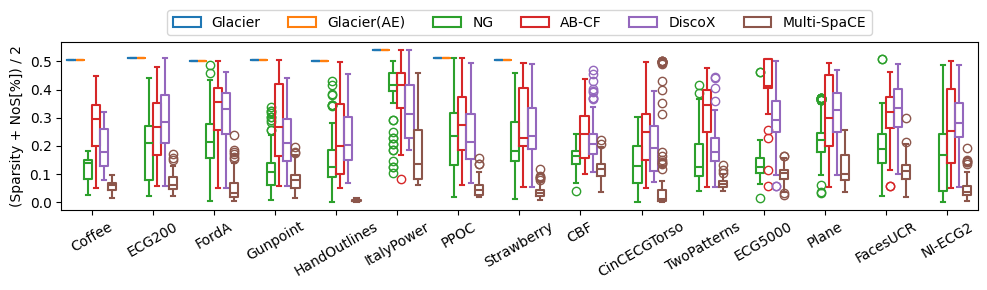

In [47]:
plt.figure(figsize=(10, 3))
ax = sns.boxplot(data=aux_df, x="Dataset", y="(Sparsity + NoS[%]) / 2", hue="Method", fill=False)
# ax.legend(loc='upper right')
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=6, title=None)
ax.set(xlabel=None)
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('./experiments/results/univariate-sparsity-contiguity.PNG', dpi=300)

In [88]:
times_df = pd.DataFrame()
for dataset in DATASETS:
    X_train, y_train, X_test, y_test = data_dict[dataset]
    dataset_ts_len, dataset_nchannels = X_train.shape[1], X_train.shape[2]
    dataset_times = results_all_datasets_df[results_all_datasets_df["dataset"] == dataset][['times', 'method', 'dataset']]
    dataset_times["dataset_ts_len"] = dataset_ts_len
    dataset_times["dataset_nchannels"] = dataset_nchannels
    times_df = pd.concat([times_df, dataset_times])
times_df = times_df.rename(columns={"times": "Seconds", "dataset_ts_len": "Time series length", 
                                    "method": "Method", "dataset_nchannels": "Channels"})

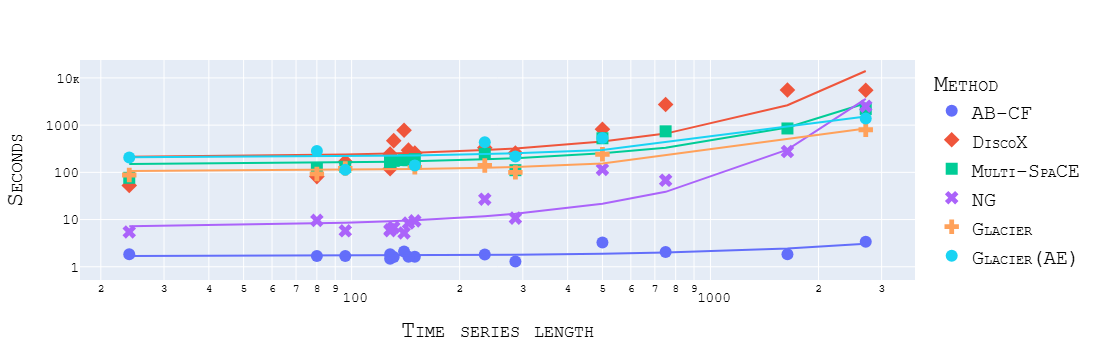

In [102]:
config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'univariate_times_length',
    'height': 400,
    'width': 1200,
    'scale':2 # Multiply title/legend/axis/canvas sizes by this factor
  }
}

fig = px.scatter(
    times_df.groupby(["dataset", "Method"]).mean().reset_index(), 
    x="Time series length", y="Seconds", color="Method", 
    symbol="Method", trendline="ols", 
    trendline_options=dict(log_y=True), log_x=True, log_y=True
)
fig.update_traces(marker={'size': 12})
fig.update_layout(
    yaxis = dict(tickfont = dict(size=14)),
    xaxis = dict(tickfont = dict(size=14)),
    font=dict(
            family="Courier New, monospace",
            size=20,
            color="black",
            variant="small-caps",
        )
)
fig.show(config=config)
fig.write_html("img_univariate_times_length.html")


In [95]:
import importlib
importlib.reload(px)

<module 'plotly.express' from 'C:\\Users\\mrefoyo\\miniconda3\\envs\\counterfactuals\\lib\\site-packages\\plotly\\express\\__init__.py'>

In [ ]:
import plotly.express as px

# Counterfactual visualization

In [11]:
import math
def plot_comp_cfs(x_orig, possible_nuns, x_cfs_dict):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    fig = plt.figure(figsize=(18, 12), dpi=600)
    grid_columns = 2
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.2, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            """# Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')"""
            # found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            proximity_values = np.abs(x_orig - x_cf.reshape(1, length, n_channels))
            found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            # ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    fig.legend(
        sub_channel_axs,     # The line objects
        labels=['x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )
    plt.tight_layout()
    plt.show()
    # plt.savefig(f'./experiments/results/examples_cfs_{dataset}_instance_{instance_index}.png', dpi=600)



In [12]:
dataset = "SelfRegulationSCP1"
aux_results_dataset = results_all_datasets_df[results_all_datasets_df["dataset"]==dataset].sort_values(by="ii")

with pd.option_context("display.max_rows", None,): 
    display(aux_results_dataset[aux_results_dataset["method"]=="COMTE"])

Empty DataFrame
Columns: [ii, nchanges, sparsity, L1, L2, proba, valid, nuns_valid, outlier_score, increase_outlier_score, subsequences, subsequences %, times, method, best cf index, order, dataset]
Index: []

In [15]:
# methods = ["subspace_grouped", "subspace_v2_grouped", "subspace_individual", "subspace_v2_individual"]
common_index_instance = 0

In [16]:
# Get data
X_train, y_train, X_test, y_test = data_dict[dataset]
common_indexes = common_test_indexes_dict[dataset]
instance_index = common_indexes[common_index_instance]

# Get common cfs calculated for all method
x_orig = X_test[instance_index]

# Get possible NUNs
possible_nuns = possible_nuns_dict[dataset]
possible_nuns_instance = {type: possible_nuns[type][instance_index] for type in ["gknn", "iknn"]}

# Get original class and desired class
original_class = original_classes_dict[dataset][instance_index]
desired_class = desired_classes_dict[dataset][instance_index]

# Get the cf calculated for all methods
sol_cfs_methods = {}
sol_methods = methods_cfs_dict[dataset]
for method, solutions in sol_methods.items():
    if 'cfs' in solutions[0]:
        counterfactuals = [solution['cfs'] for solution in solutions]
    else:
        counterfactuals = [solution['cf'] for solution in solutions] 
    # Extract best counterfactual in case of multi objective
    counterfactual = counterfactuals[common_index_instance]
    # Extract best index solution
    aux_results_dataset_method = aux_results_dataset[aux_results_dataset["method"] == method]
    best_cf_index = aux_results_dataset_method.iloc[common_index_instance]["best cf index"]
    best_cf = counterfactual[best_cf_index]
    best_cf = np.expand_dims(best_cf, axis=0)
    # Append to dictionary
    sol_cfs_methods[method] = best_cf
    
# Show result
print(f'Sample {instance_index}: true class {y_test[instance_index]}, x_orig predicted {original_class}, desired_class  {desired_class}')
plot_comp_cfs(x_orig, possible_nuns_instance, sol_cfs_methods)

Sample 0: true class 1, x_orig predicted 1, desired_class  0


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_6508\3847629260.py:31: RuntimeWarning: divide by zero encountered in divide
  found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_6508\3847629260.py:31: RuntimeWarning: invalid value encountered in divide
  found_counterfactual_mask = (proximity_values > np.abs(x_orig)/proximity_values*0.0001).astype(int)
C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_6508\3847629260.py:63: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(
C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_6508\3847629260.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [ ]:
# Create plot with examples of each method in each dataset

In [ ]:
# CBF: 1, 2, 10, 18, 19
# chinatown: 3, 7, 19
# coffee: 1, 3, 9, 16
# ECG200: 0, 13
# gunpoint: 9, 10, 15 (pesimos en general)
dataset_samples = [('CBF', 2), ('chinatown', 19), ('coffee', 3), ('ECG200', 13), ('gunpoint', 15)]
methods_trad_dict = {"wcf_ng": "W-CF", "ng": "NG", "ab_cf": "AB-CF", "subspace": "Sub-SpaCE"}
methods = list(methods_trad_dict.keys())
include_nun_list = [False, False, False, False]

In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(16, 6))
grid_rows = len(methods)
grid_columns = len(dataset_samples)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer % grid_columns
    dataset, instance = dataset_samples[i_dataset]
    column_title = f'{dataset} instance {instance}'
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer // grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break

    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        if m == 0:
            ax.set_title(column_title)
        if i_dataset == 0:
            ax.set_ylabel(methods_trad_dict[method_name], size='large')
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    loc='lower center',
    # loc='center right',
    prop={'size': 14},
    ncol=3
)"""
# plt.show()
# plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(12, 12))
grid_rows = len(dataset_samples)
grid_columns = len(methods)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer // grid_columns
    dataset, instance = dataset_samples[i_dataset]
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer % grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break
    
    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        column_title = methods_trad_dict[method_name]
        # row_title = f'{dataset} \n instance {instance}'
        row_title = f'{dataset} [{instance}]'
        if m == 0:
            ax.set_ylabel(row_title, fontsize=16, rotation=90)
        if i_dataset == 0:
            ax.set_title(column_title, fontsize=18)
            
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    # loc='lower center',
    loc='center right',
    prop={'size': 18},
    ncol=1
)"""
# plt.show()
plt.savefig('./experiments/results/examples_cfs.png', dpi=300)
